# Isomip+ z-level

In [1]:
# %cd /pscratch/sd/m/mlarson/isomip_plus_2km_z-star_Ocean0/
# %source load_compass_env.sh
## import modules
import functions
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.colors
import numpy as np
matplotlib.rcParams.update({'font.size': 16})

In [2]:
## load in the data
ds_land_ice_fluxes = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_allSteps/ocean/isomip_plus/planar/5km/z-star/Ocean0/simulation/land_ice_fluxes.nc')
ds_output = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_allSteps/ocean/isomip_plus/planar/5km/z-star/Ocean0/simulation/output.nc')
ds_timeMonthly = xr.open_mfdataset('/pscratch/sd/m/mlarson/pr_100_allSteps/ocean/isomip_plus/planar/5km/z-star/Ocean0/simulation/timeSeriesStatsMonthly.*.nc')
ds_land_ice_fluxes_RK4 = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_RK4/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/land_ice_fluxes.nc')
ds_output_RK4 = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_RK4/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/output.nc')
ds_timeMonthly_RK4 = xr.open_mfdataset('/pscratch/sd/m/mlarson/pr_100_RK4/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/timeSeriesStatsMonthly.*.nc')
## load in the mesh and mask data for the 2-km grid
# mesh = xr.open_dataset('/pscratch/sd/m/mlarson/dsMesh_2km.nc')
# mask = xr.open_dataset('/pscratch/sd/m/mlarson/cavityMask_2km.nc')

See if ``landIcePressure`` is constant throughout the simulation:

In [4]:
for i in range(len(ds_land_ice_fluxes.Time)):
    print(all(ds_land_ice_fluxes.landIcePressure.isel(Time=0)) == all(ds_land_ice_fluxes.landIcePressure.isel(Time=i)))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


Invesitage the density field to determine how much of the ``landIceDraft`` (SSH) change is due to the hydrostatic equilibrium height of the ice changing and how much of it is due to dynamic changes:

In [16]:
for i in range(len(ds_land_ice_fluxes.Time)):
    print(all(ds_land_ice_fluxes.landIceDraft.isel(Time=0)) == all(ds_land_ice_fluxes.landIceDraft.isel(Time=i)))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [19]:
for i in range(len(ds_land_ice_fluxes.Time)):
    print(all(ds_output.ssh.isel(Time=0)) == all(ds_output.ssh.isel(Time=i)))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


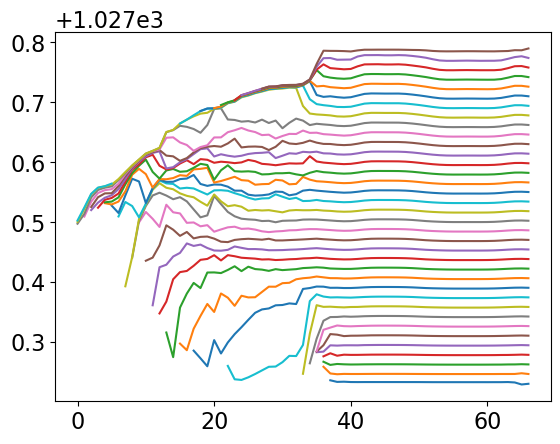

In [9]:
plt.plot(ds_output_dot_var.isel(Time=midx,nCells=larger_same_y_idx[5]).values)
plt.show()

In [10]:
 #list(ds_output.keys())
variables = [
 'normalVelocity',
 'kineticEnergyCell',
 'vertVelocityTop',
 'layerThickness',
 'zMid',
 'ssh',
 'landIcePressure',
 'seaIcePressure',
 'atmosphericPressure',
 'surfaceStressMagnitude',
 'surfaceThicknessFlux',
 'velocityX',
 'velocityY',
 'temperatureSurfaceValue',
 'salinitySurfaceValue',
 'surfaceVelocityZonal',
 'surfaceVelocityMeridional',
 'temperature',
 'salinity',
 'temperatureSurfaceFlux',
 'salinitySurfaceFlux',
 'temperatureSurfaceFluxRunoff',
 'salinitySurfaceFluxRunoff',
 'temperatureSurfaceFluxRemoved',
 'salinitySurfaceFluxRemoved',
 'nonLocalTemperatureSurfaceFlux',
 'nonLocalSalinitySurfaceFlux',]

print(len(variables))

27


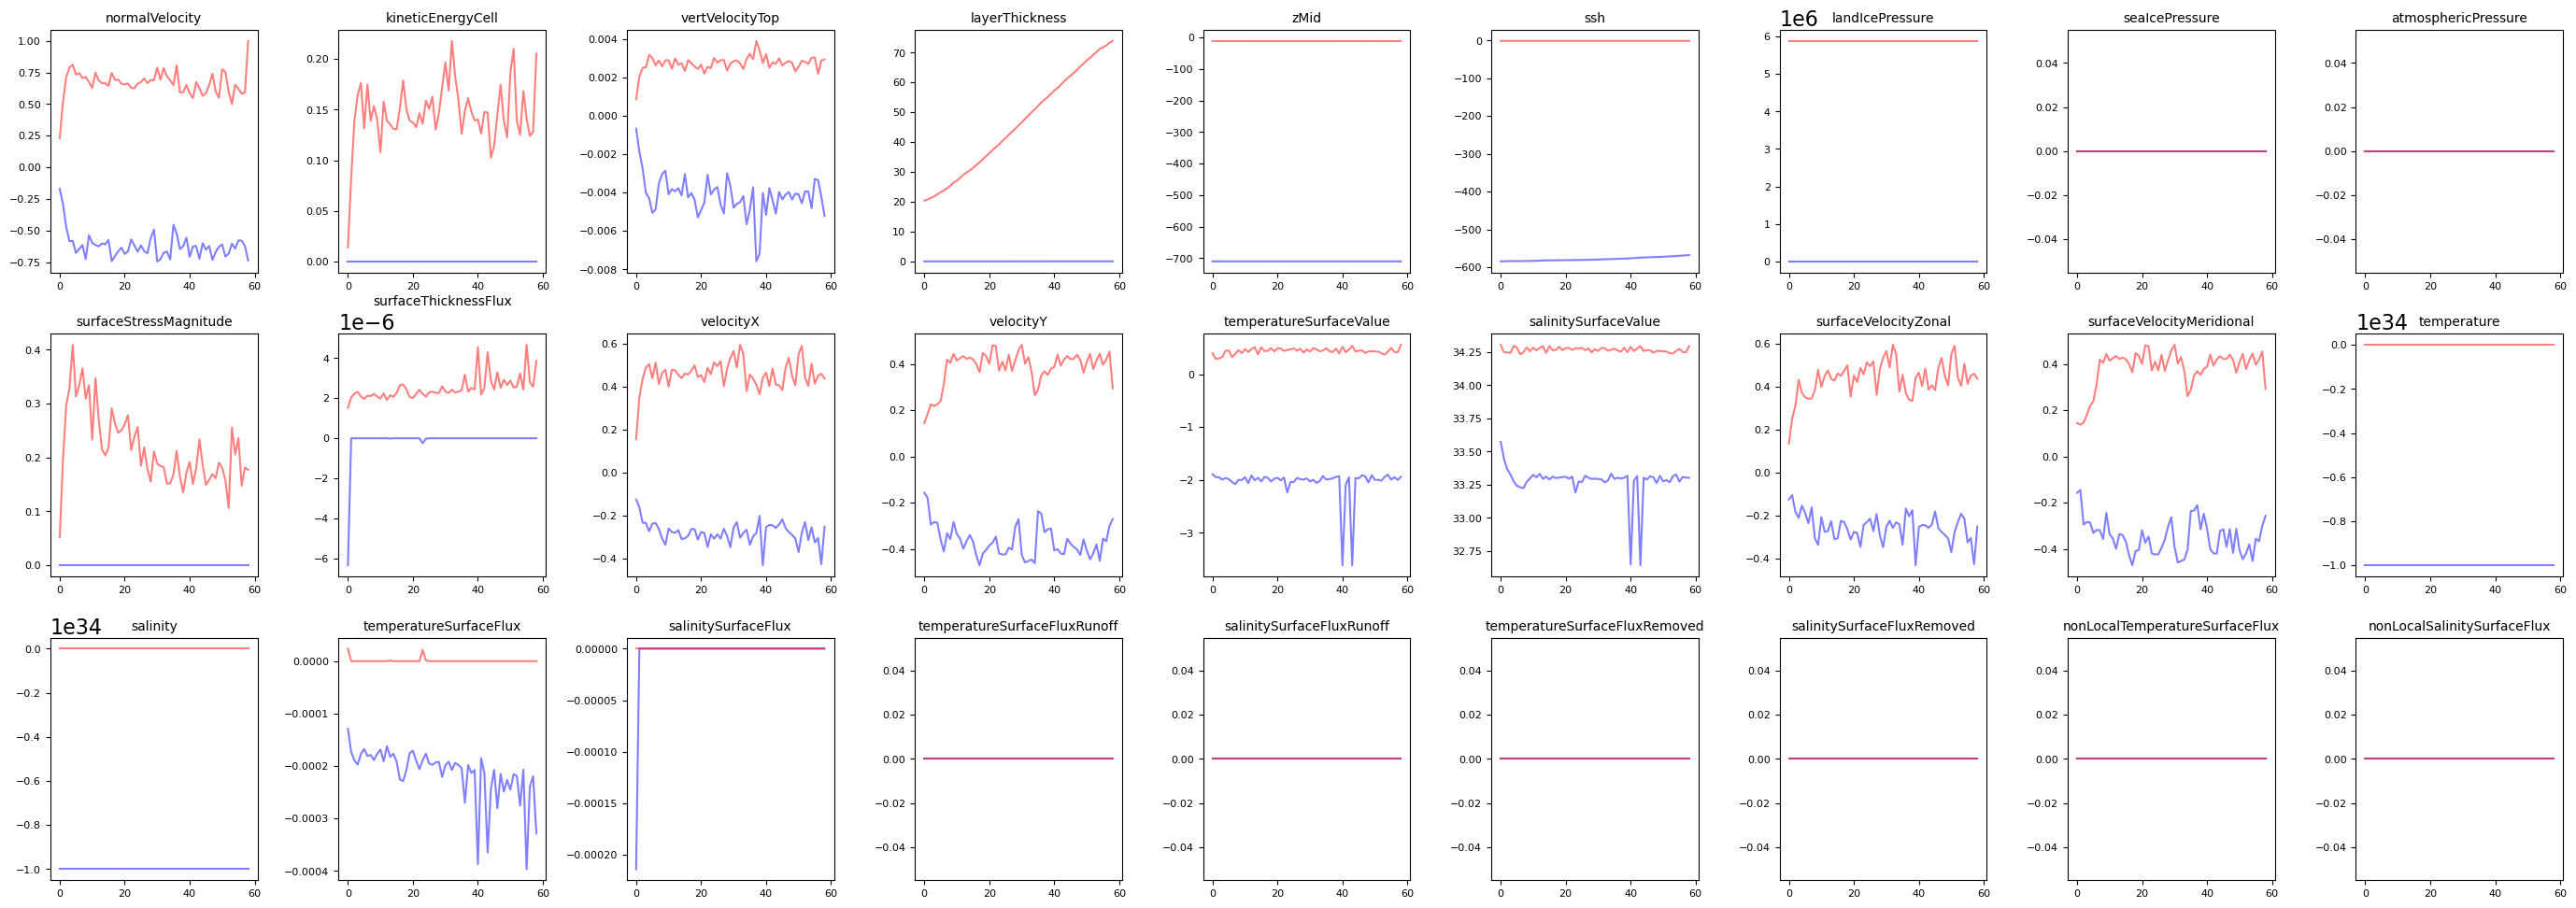

In [78]:
fig, ax = plt.subplots(3,9,figsize=(28,10))
# ax.set_box_aspect(1)
plt.tight_layout()
# plt.tick_params(axis='both', which='major', labelsize=8)

i = 0
for r in range(3):
    for c in range(9):
        dims = ds_output[variables[i]].dims
        dims = dims[1:] ## do not want to reduce along Time
        ax[r,c].plot(ds_output.Time, ds_output[variables[i]].min(dim=dims), color = 'blue', alpha=0.5)
        ax[r,c].plot(ds_output.Time, ds_output[variables[i]].max(dim=dims), color = 'red', alpha=0.5)
        ax[r,c].set_title(variables[i], fontsize=10)
        ax[r,c].tick_params(axis='both', which='major', labelsize=8)
        if i == 27:
            break
        else: i+=1


plt.show()

In [11]:
#list(ds_land_ice_fluxes.keys())
variables_landIce = ['ssh',
 'atmosphericPressure',
 'landIcePressure',
 'landIceDraft',
 'landIceFraction',
 'landIceMask',
 'landIceFrictionVelocity',
 'topDrag',
 'topDragMagnitude',
 'landIceFreshwaterFlux',
 'landIceHeatFlux',
 'heatFluxToLandIce',
 'accumulatedLandIceMass',
 'accumulatedLandIceHeat',
 'landIceFloatingFraction',
 'landIceFloatingMask',
 'landIceBoundaryLayerTemperature',
 'landIceBoundaryLayerSalinity',
 'landIceHeatTransferVelocity',
 'landIceSaltTransferVelocity',
 'landIceInterfaceTemperature',
 'landIceInterfaceSalinity']
print(len(variables_landIce))

22


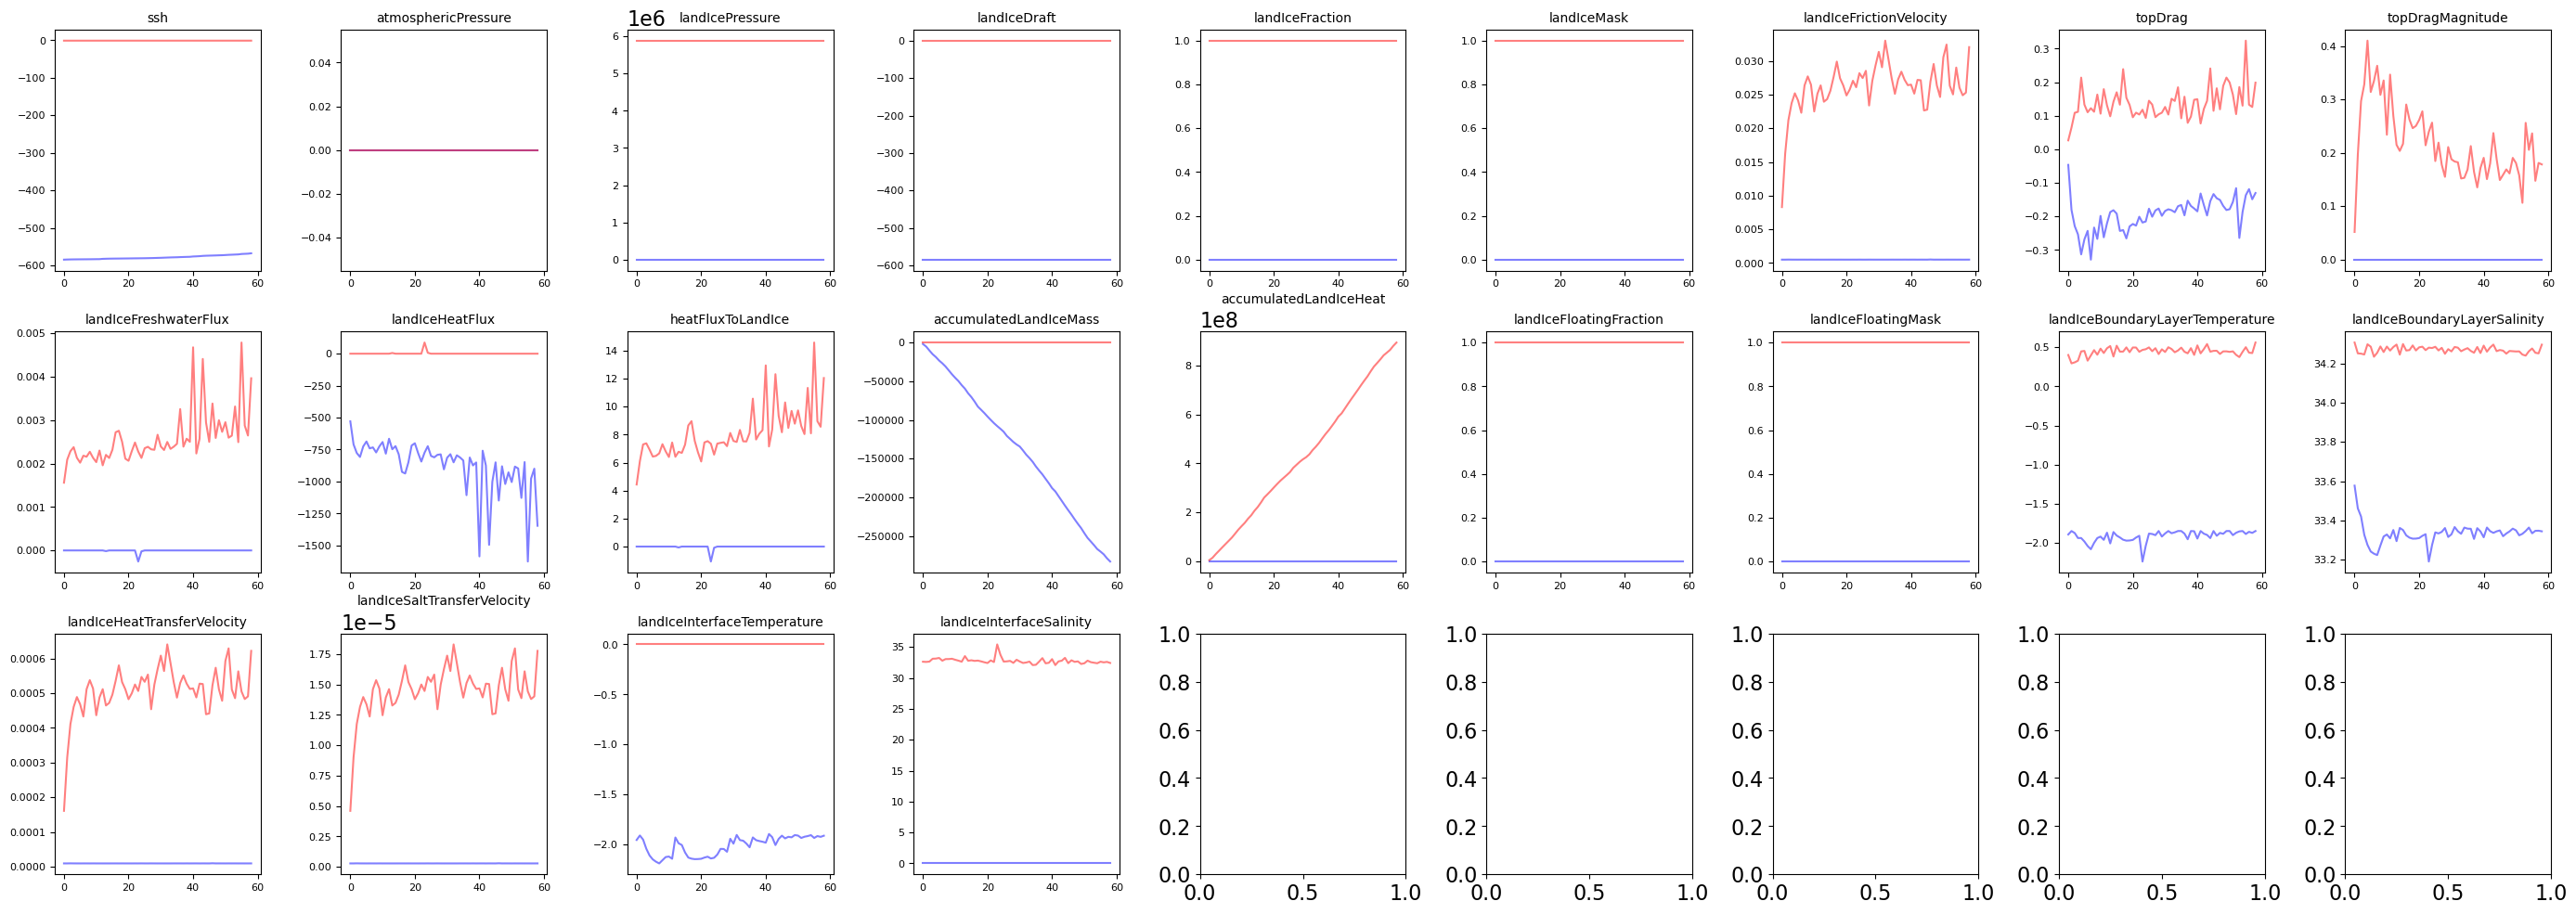

In [87]:
fig, ax = plt.subplots(3,9,figsize=(28,10))
# ax.set_box_aspect(1)
plt.tight_layout()
# plt.tick_params(axis='both', which='major', labelsize=8)

i = 0
for r in range(3):
    for c in range(9):
        dims = ds_land_ice_fluxes[variables_landIce[i]].dims
        dims = dims[1:] ## do not want to reduce along Time
        ax[r,c].plot(ds_output.Time, ds_land_ice_fluxes[variables_landIce[i]].min(dim=dims), color = 'blue', alpha=0.5)
        ax[r,c].plot(ds_output.Time, ds_land_ice_fluxes[variables_landIce[i]].max(dim=dims), color = 'red', alpha=0.5)
        ax[r,c].set_title(variables_landIce[i], fontsize=10)
        ax[r,c].tick_params(axis='both', which='major', labelsize=8)
        if i == len(variables_landIce)-1:
            break
        else: i+=1


plt.show()

In [12]:
#list(ds_timeMonthly.keys())
variables_timeMonthy = [
 'timeMonthly_avg_layerThickness',
 'timeMonthly_avg_density',
 'timeMonthly_avg_potentialDensity',
 'timeMonthly_avg_ssh',
 'timeMonthly_avg_zMid',
 'timeMonthly_avg_pressure',
 'timeMonthly_avg_normalVelocity',
 'timeMonthly_avg_velocityX',
 'timeMonthly_avg_velocityY',
 'timeMonthly_avg_vertVelocityTop',
 'timeMonthly_avg_landIceFreshwaterFlux',
 'timeMonthly_avg_landIceHeatFlux',
 'timeMonthly_avg_heatFluxToLandIce',
 'timeMonthly_avg_areaCellGlobal',
 'timeMonthly_avg_CFLNumberGlobal',
 'timeMonthly_avg_atmosphericPressure',
 'timeMonthly_avg_landIcePressure',
 'timeMonthly_avg_landIceDraft',
 'timeMonthly_avg_landIceFraction',
 'timeMonthly_avg_landIceFloatingFraction',
 'timeMonthly_avg_landIceFrictionVelocity',
 'timeMonthly_avg_topDrag',
 'timeMonthly_avg_topDragMagnitude',
 'timeMonthly_avg_accumulatedLandIceMass',
 'timeMonthly_avg_accumulatedLandIceHeat',
 'timeMonthly_avg_landIceBoundaryLayerTracers_landIceBoundaryLayerTemperature',
 'timeMonthly_avg_landIceBoundaryLayerTracers_landIceBoundaryLayerSalinity',
 'timeMonthly_avg_landIceInterfaceTracers_landIceInterfaceTemperature',
 'timeMonthly_avg_landIceInterfaceTracers_landIceInterfaceSalinity',
 'timeMonthly_avg_activeTracers_temperature',
 'timeMonthly_avg_activeTracers_salinity']

print(len(variables_timeMonthy))

31


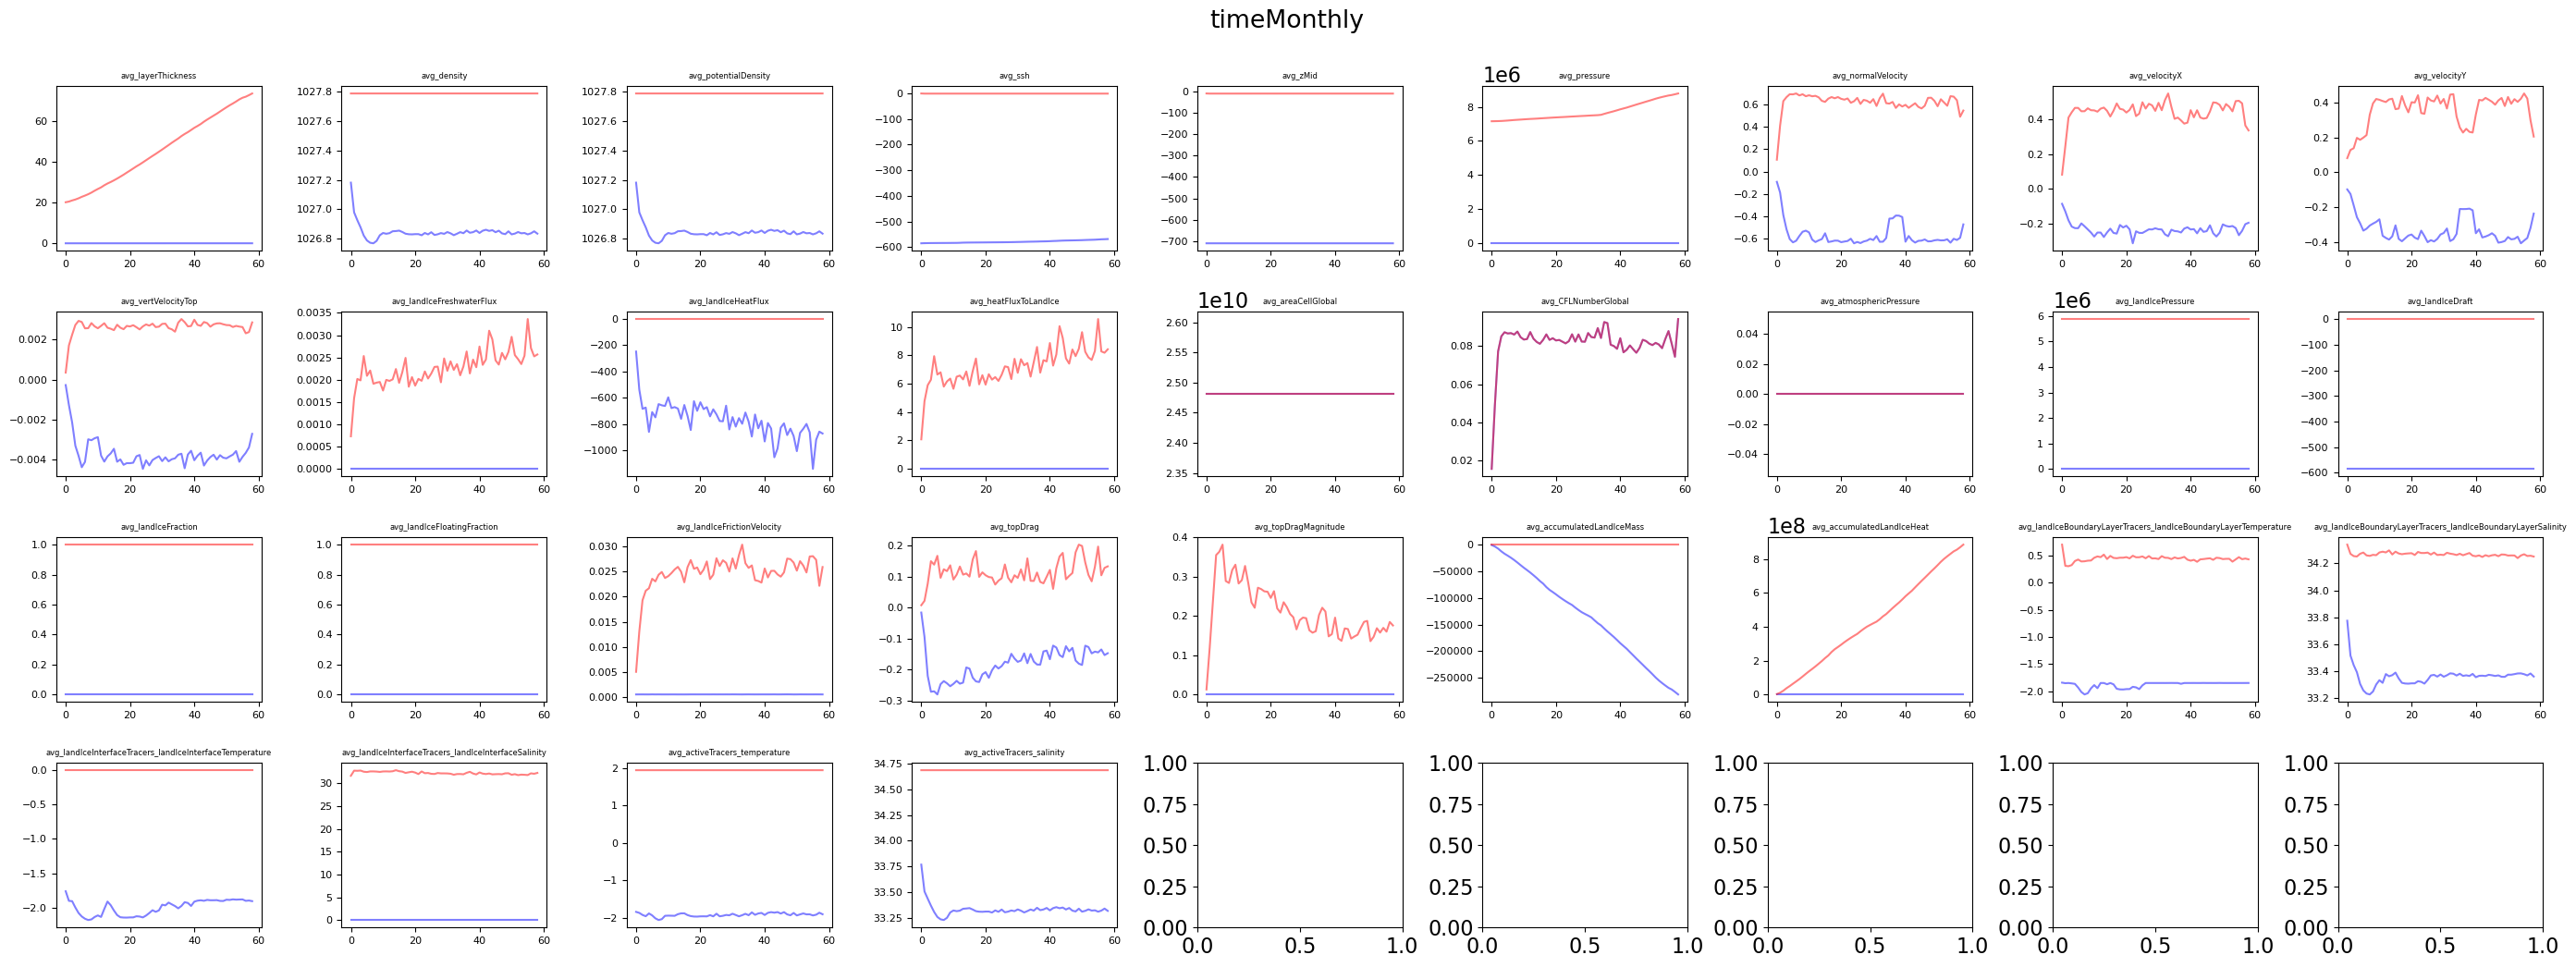

In [102]:
fig, ax = plt.subplots(4,9,figsize=(28,10))
# ax.set_box_aspect(1)
plt.tight_layout()
# plt.tick_params(axis='both', which='major', labelsize=8)

i = 0
for r in range(4):
    for c in range(9):
        dims = ds_timeMonthly[variables_timeMonthy[i]].dims
        dims = dims[1:] ## do not want to reduce along Time
        ax[r,c].plot(ds_output.Time, ds_timeMonthly[variables_timeMonthy[i]].min(dim=dims), color = 'blue', alpha=0.5)
        ax[r,c].plot(ds_output.Time, ds_timeMonthly[variables_timeMonthy[i]].max(dim=dims), color = 'red', alpha=0.5)
        ax[r,c].set_title(variables_timeMonthy[i][12:], fontsize=6,wrap=True)
        ax[r,c].tick_params(axis='both', which='major', labelsize=8)
        if i == len(variables_timeMonthy)-1:
            break
        else: i+=1

plt.suptitle('timeMonthly', y=1.05)
plt.show()

## Look at density and pressure:

In [14]:
ds_timeMonthly.timeMonthly_avg_density

<xarray.DataArray 'timeMonthly_avg_density' (Time: 59, nCells: 1146,
                                             nVertLevels: 36)> Size: 19MB
dask.array<concatenate, shape=(59, 1146, 36), dtype=float64, chunksize=(1, 1146, 36), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) object 472B 0001-01-16 12:00:00 ... 0005-11-16 00:00:00
Dimensions without coordinates: nCells, nVertLevels
Attributes:
    units:               kg m^-3
    long_name:           density
    missing_value_mask:  cellMask

In [3]:
## find which indices are along the same y value
first = True
larger_same_y_idx = []
same_y_idx = []
y_val_start = ds_output.yCell[0]
for i in range(len(ds_output.xCell)):
    y_val = ds_output.yCell[i]
    if y_val == y_val_start:
        same_y_idx.append(i)
    else:
        larger_same_y_idx.append(same_y_idx)
        same_y_idx = []
        same_y_idx.append(i)
        y_val_start = y_val

/tmp/ipykernel_795308/997696704.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),
/tmp/ipykernel_795308/997696704.py:31: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')


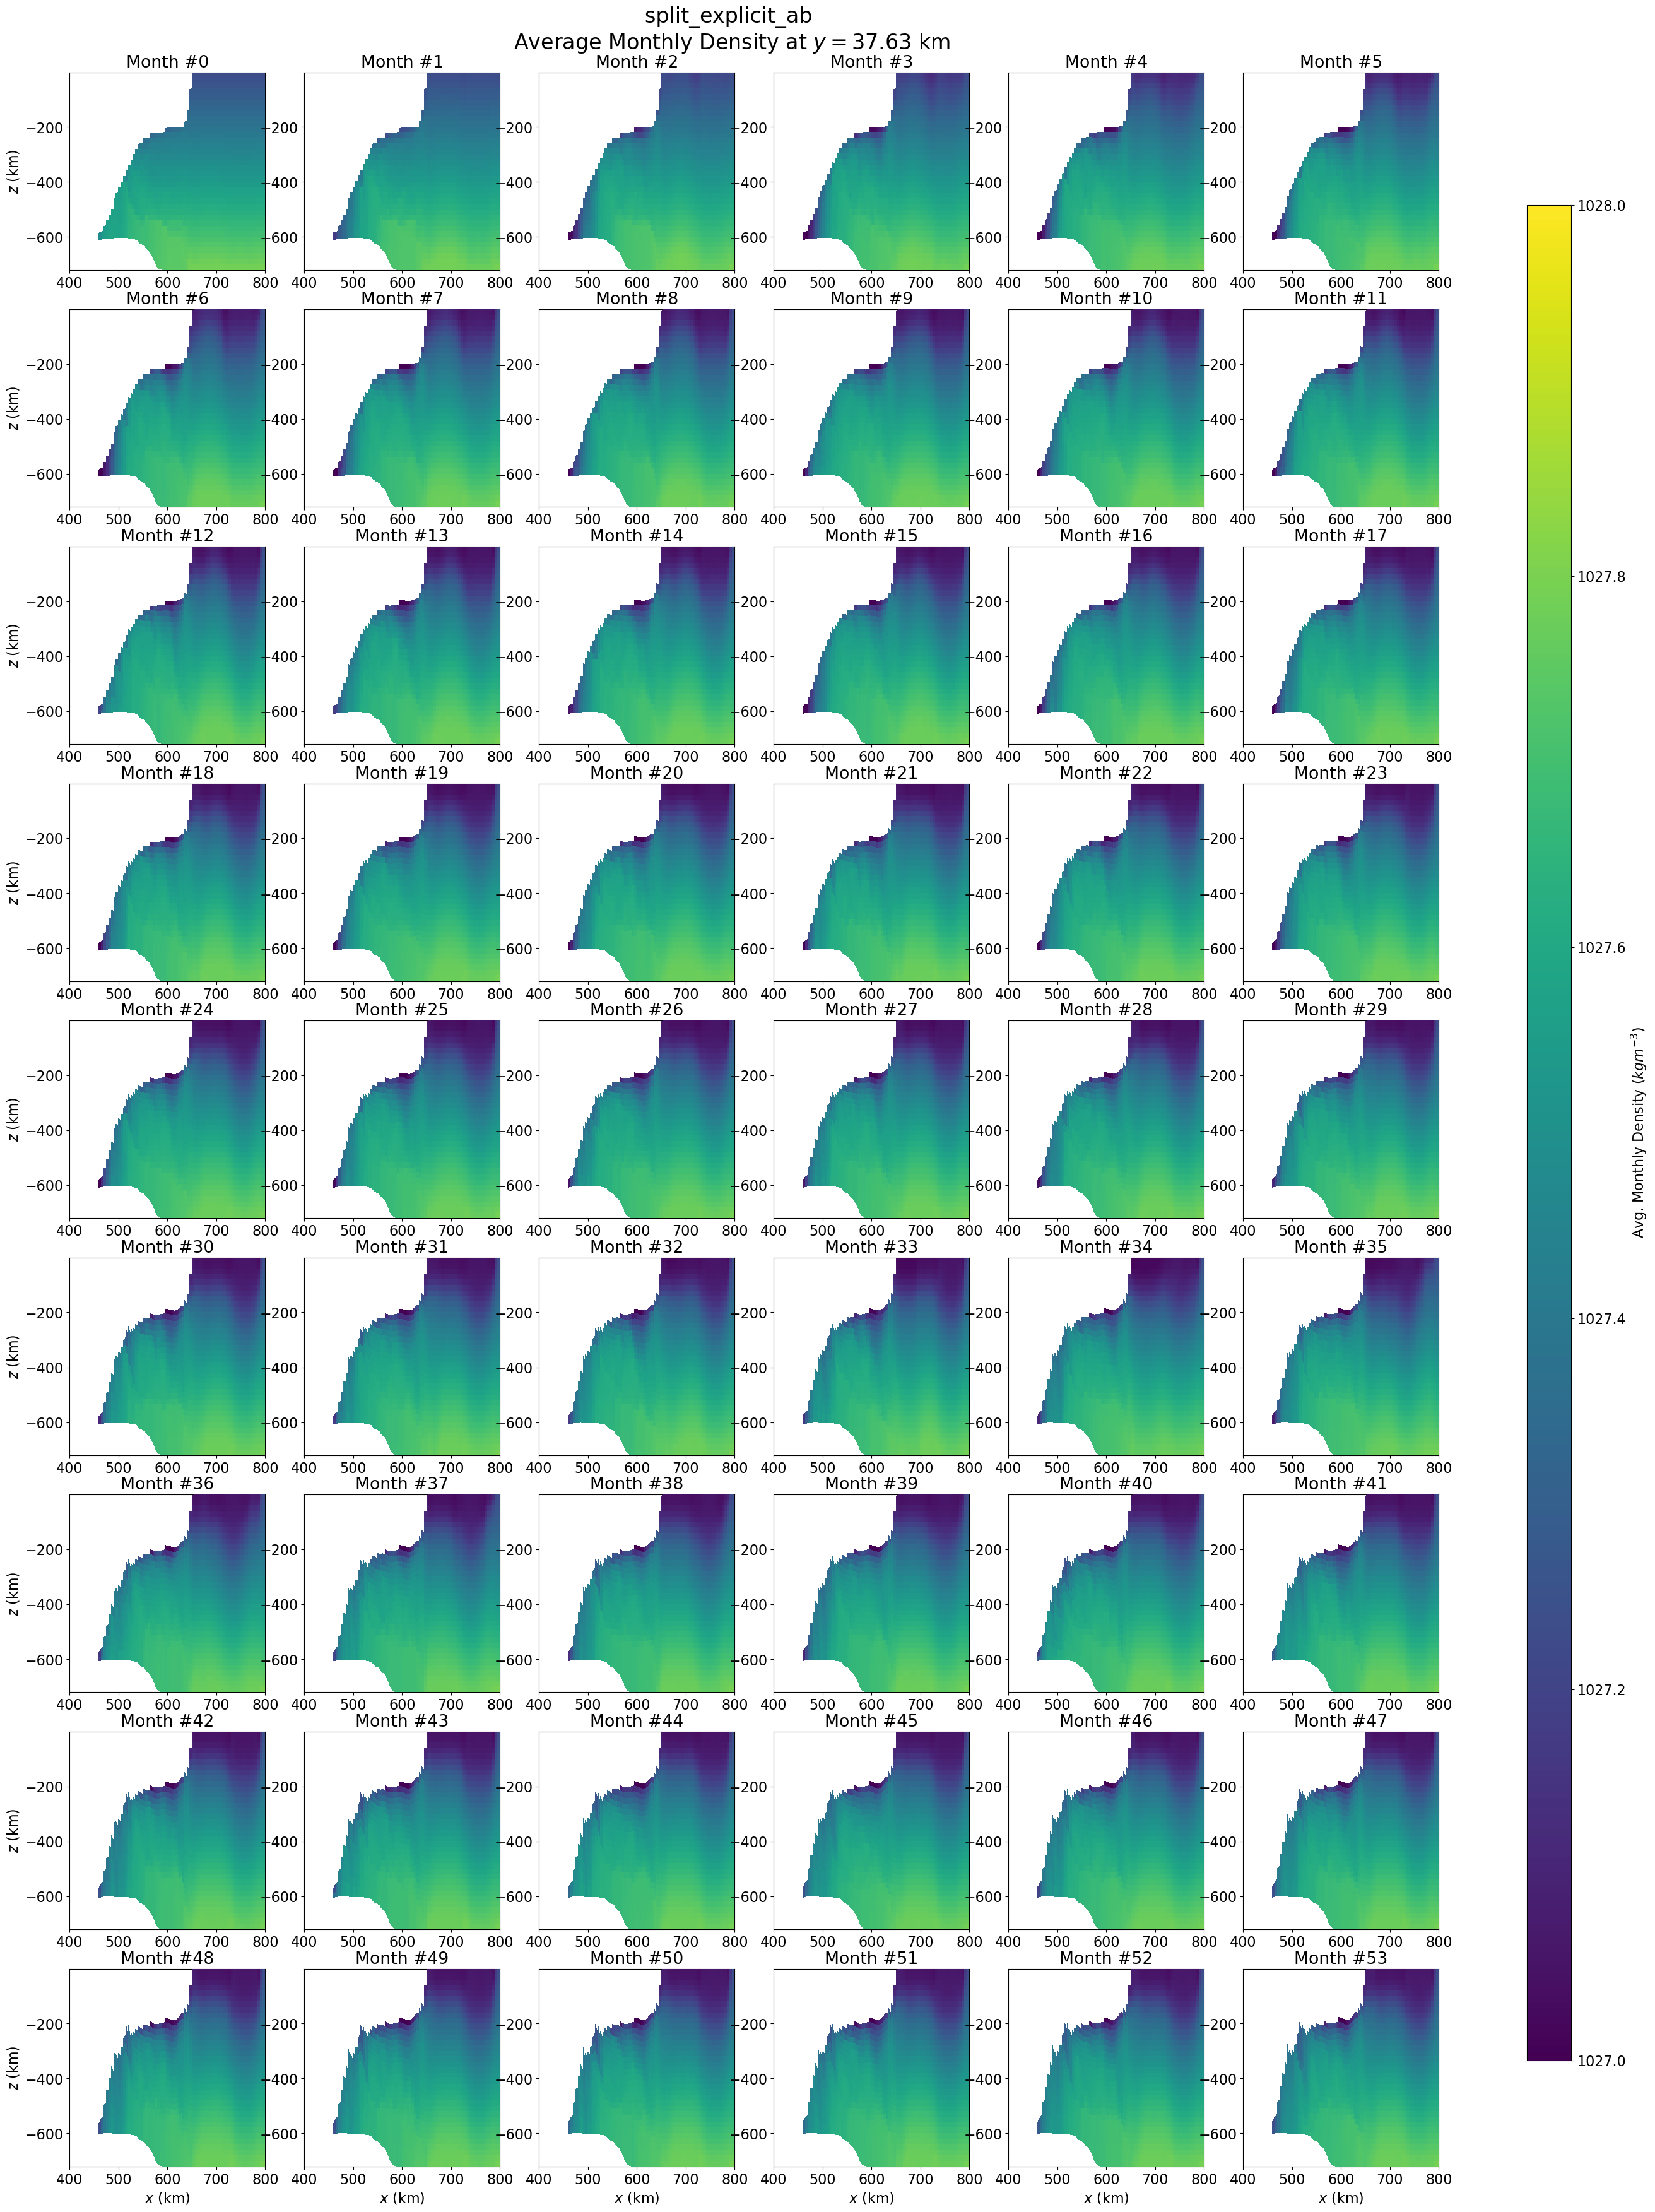

In [15]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(9,6, figsize=(28,42))

y_idx = 8
for r in np.arange(0,9,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=1027,vmax=1028,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')
fig.suptitle('split_explicit_ab \n'+r'Average Monthly Density at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=24, ha='center', x = 0.5, y = 0.925)
plt.show()

/tmp/ipykernel_795308/3027129687.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_RK4.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_RK4.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),
/tmp/ipykernel_795308/3027129687.py:37: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')


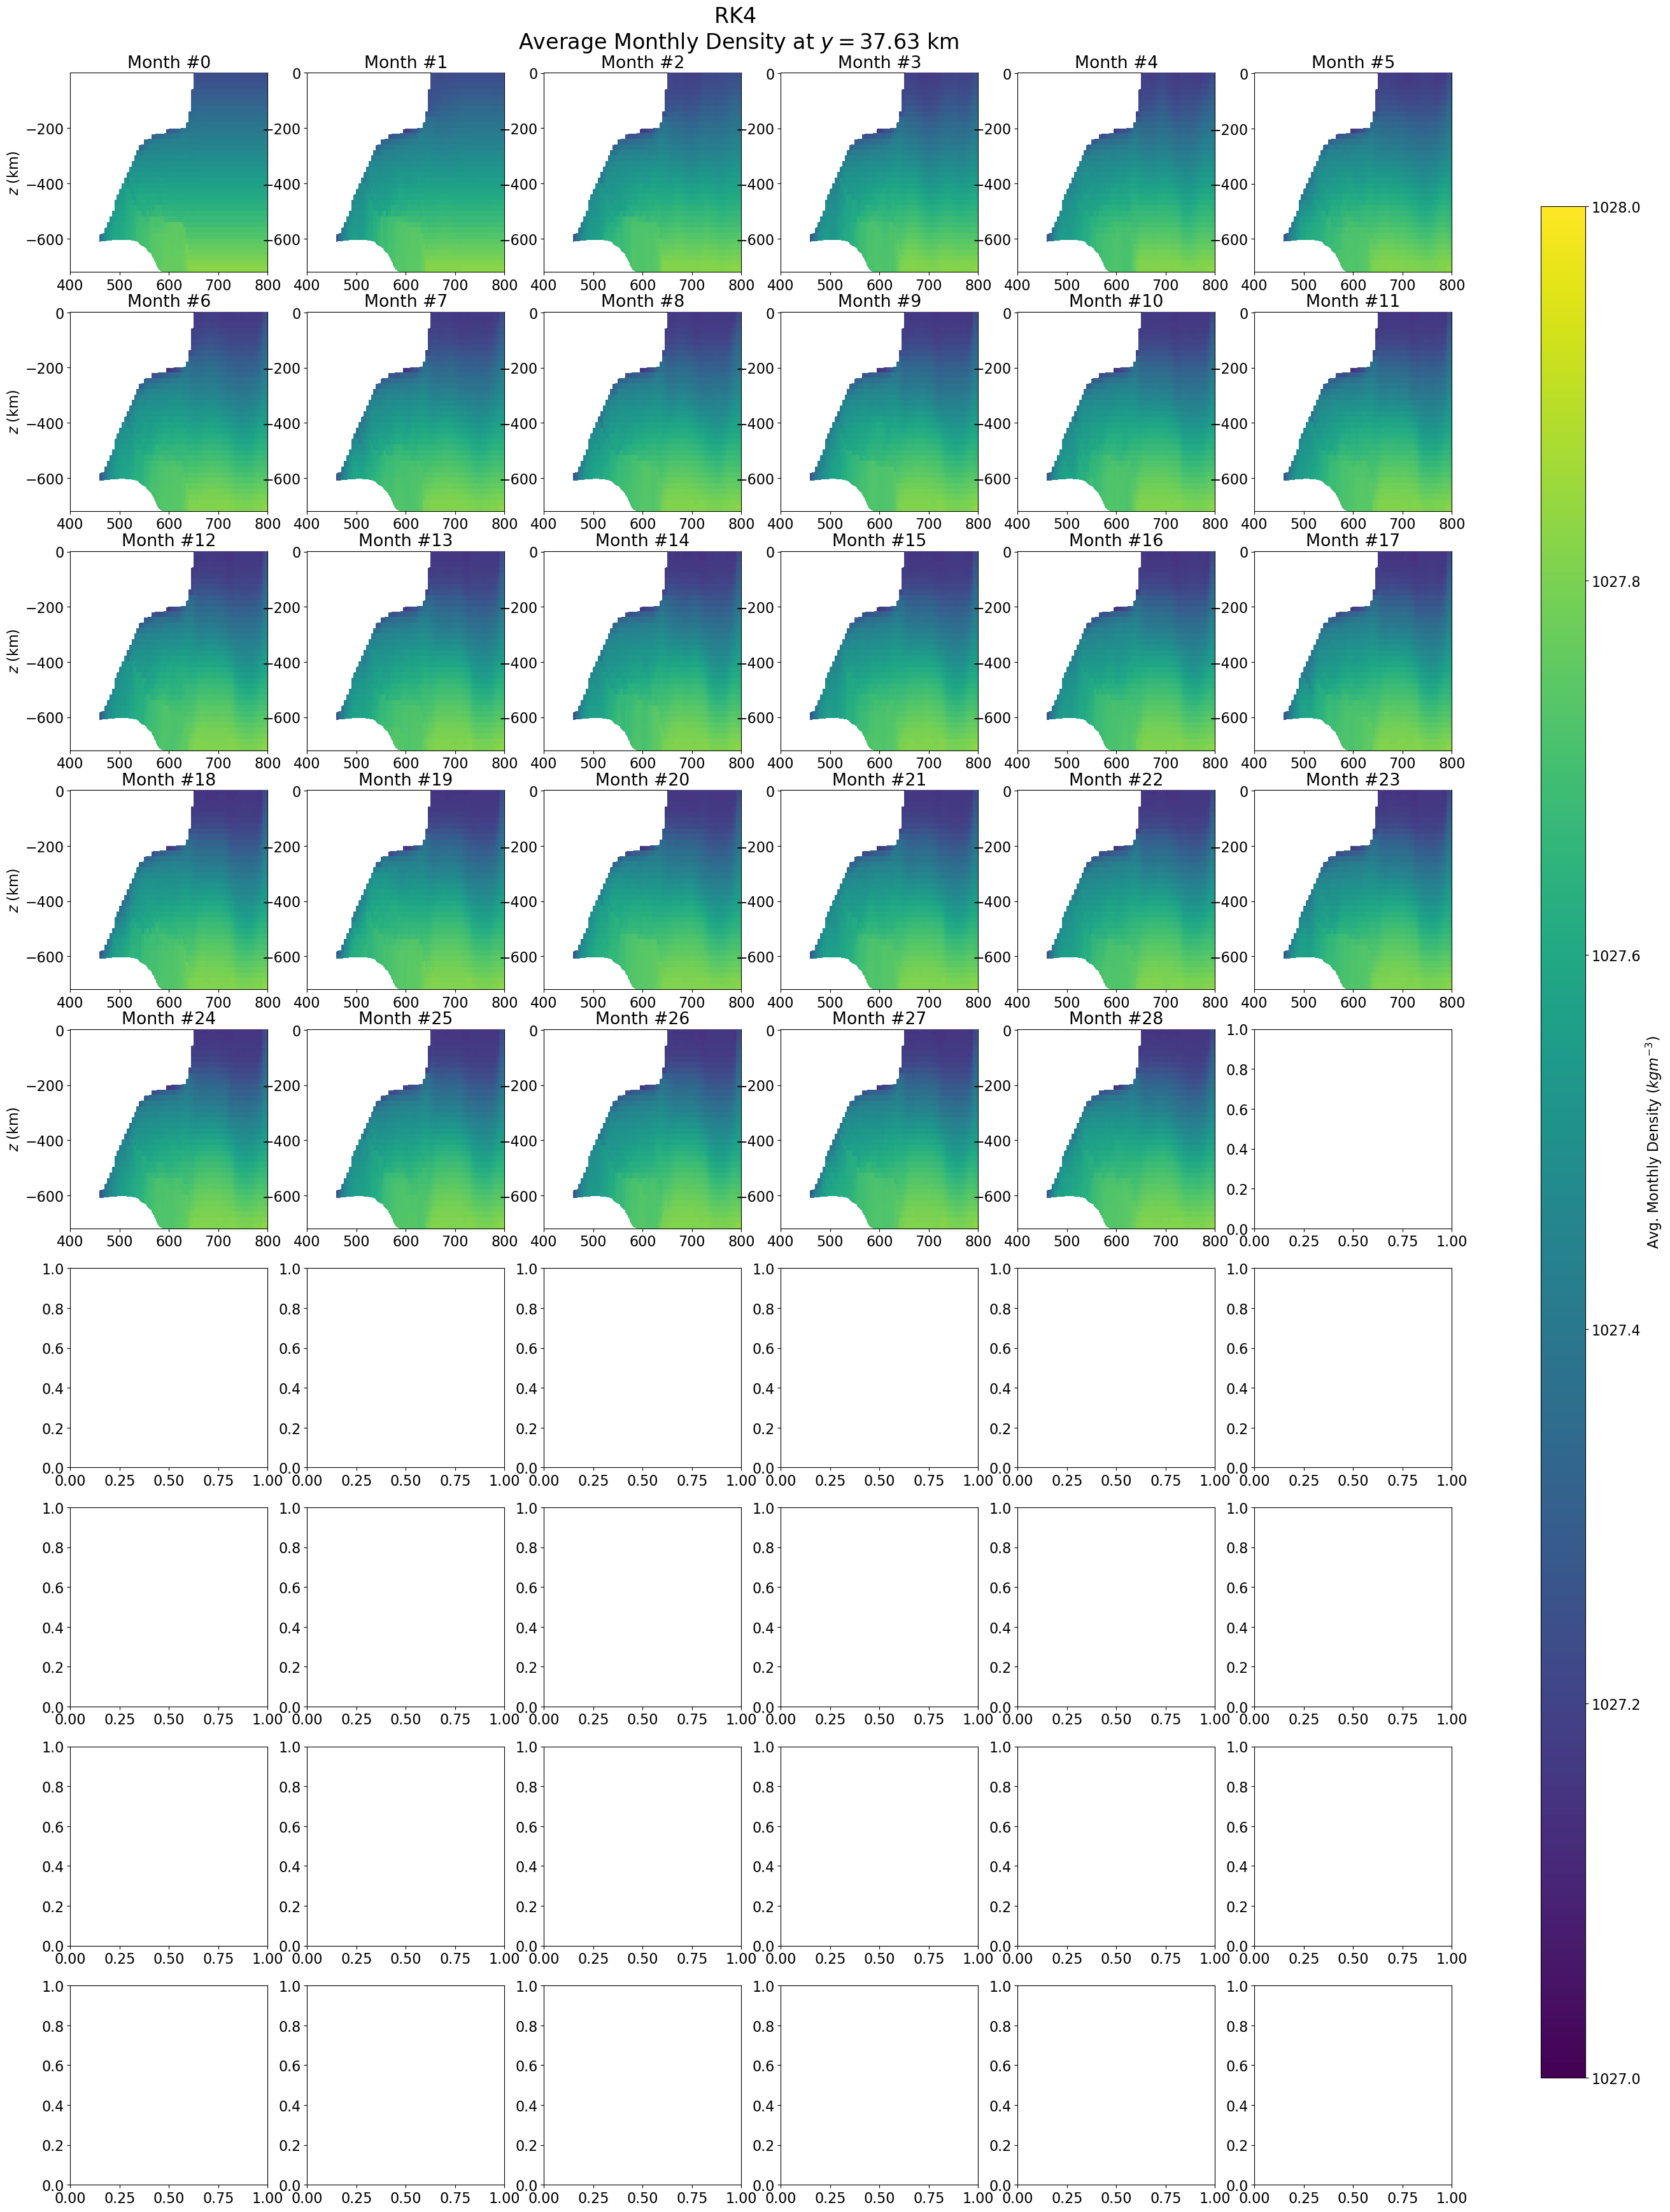

In [16]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(9,6, figsize=(28,42))

y_idx = 8
for r in np.arange(0,9,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output_RK4.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_RK4.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_RK4.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=1027,vmax=1028,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1
        
        if midx == len(ds_output_RK4.Time):
            break
            
    if midx == len(ds_output_RK4.Time):
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')
fig.suptitle('RK4 \n'+r'Average Monthly Density at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=24, ha='center', x = 0.5, y = 0.925)
plt.show()

In [43]:
ds_timeMonthly.timeMonthly_avg_pressure

<xarray.DataArray 'timeMonthly_avg_pressure' (Time: 59, nCells: 1146,
                                              nVertLevels: 36)> Size: 19MB
dask.array<concatenate, shape=(59, 1146, 36), dtype=float64, chunksize=(1, 1146, 36), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) object 472B 0001-01-16 12:00:00 ... 0005-11-16 00:00:00
Dimensions without coordinates: nCells, nVertLevels
Attributes:
    units:      N m^-2
    long_name:  pressure used in the momentum equation

/tmp/ipykernel_795308/1363313965.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),


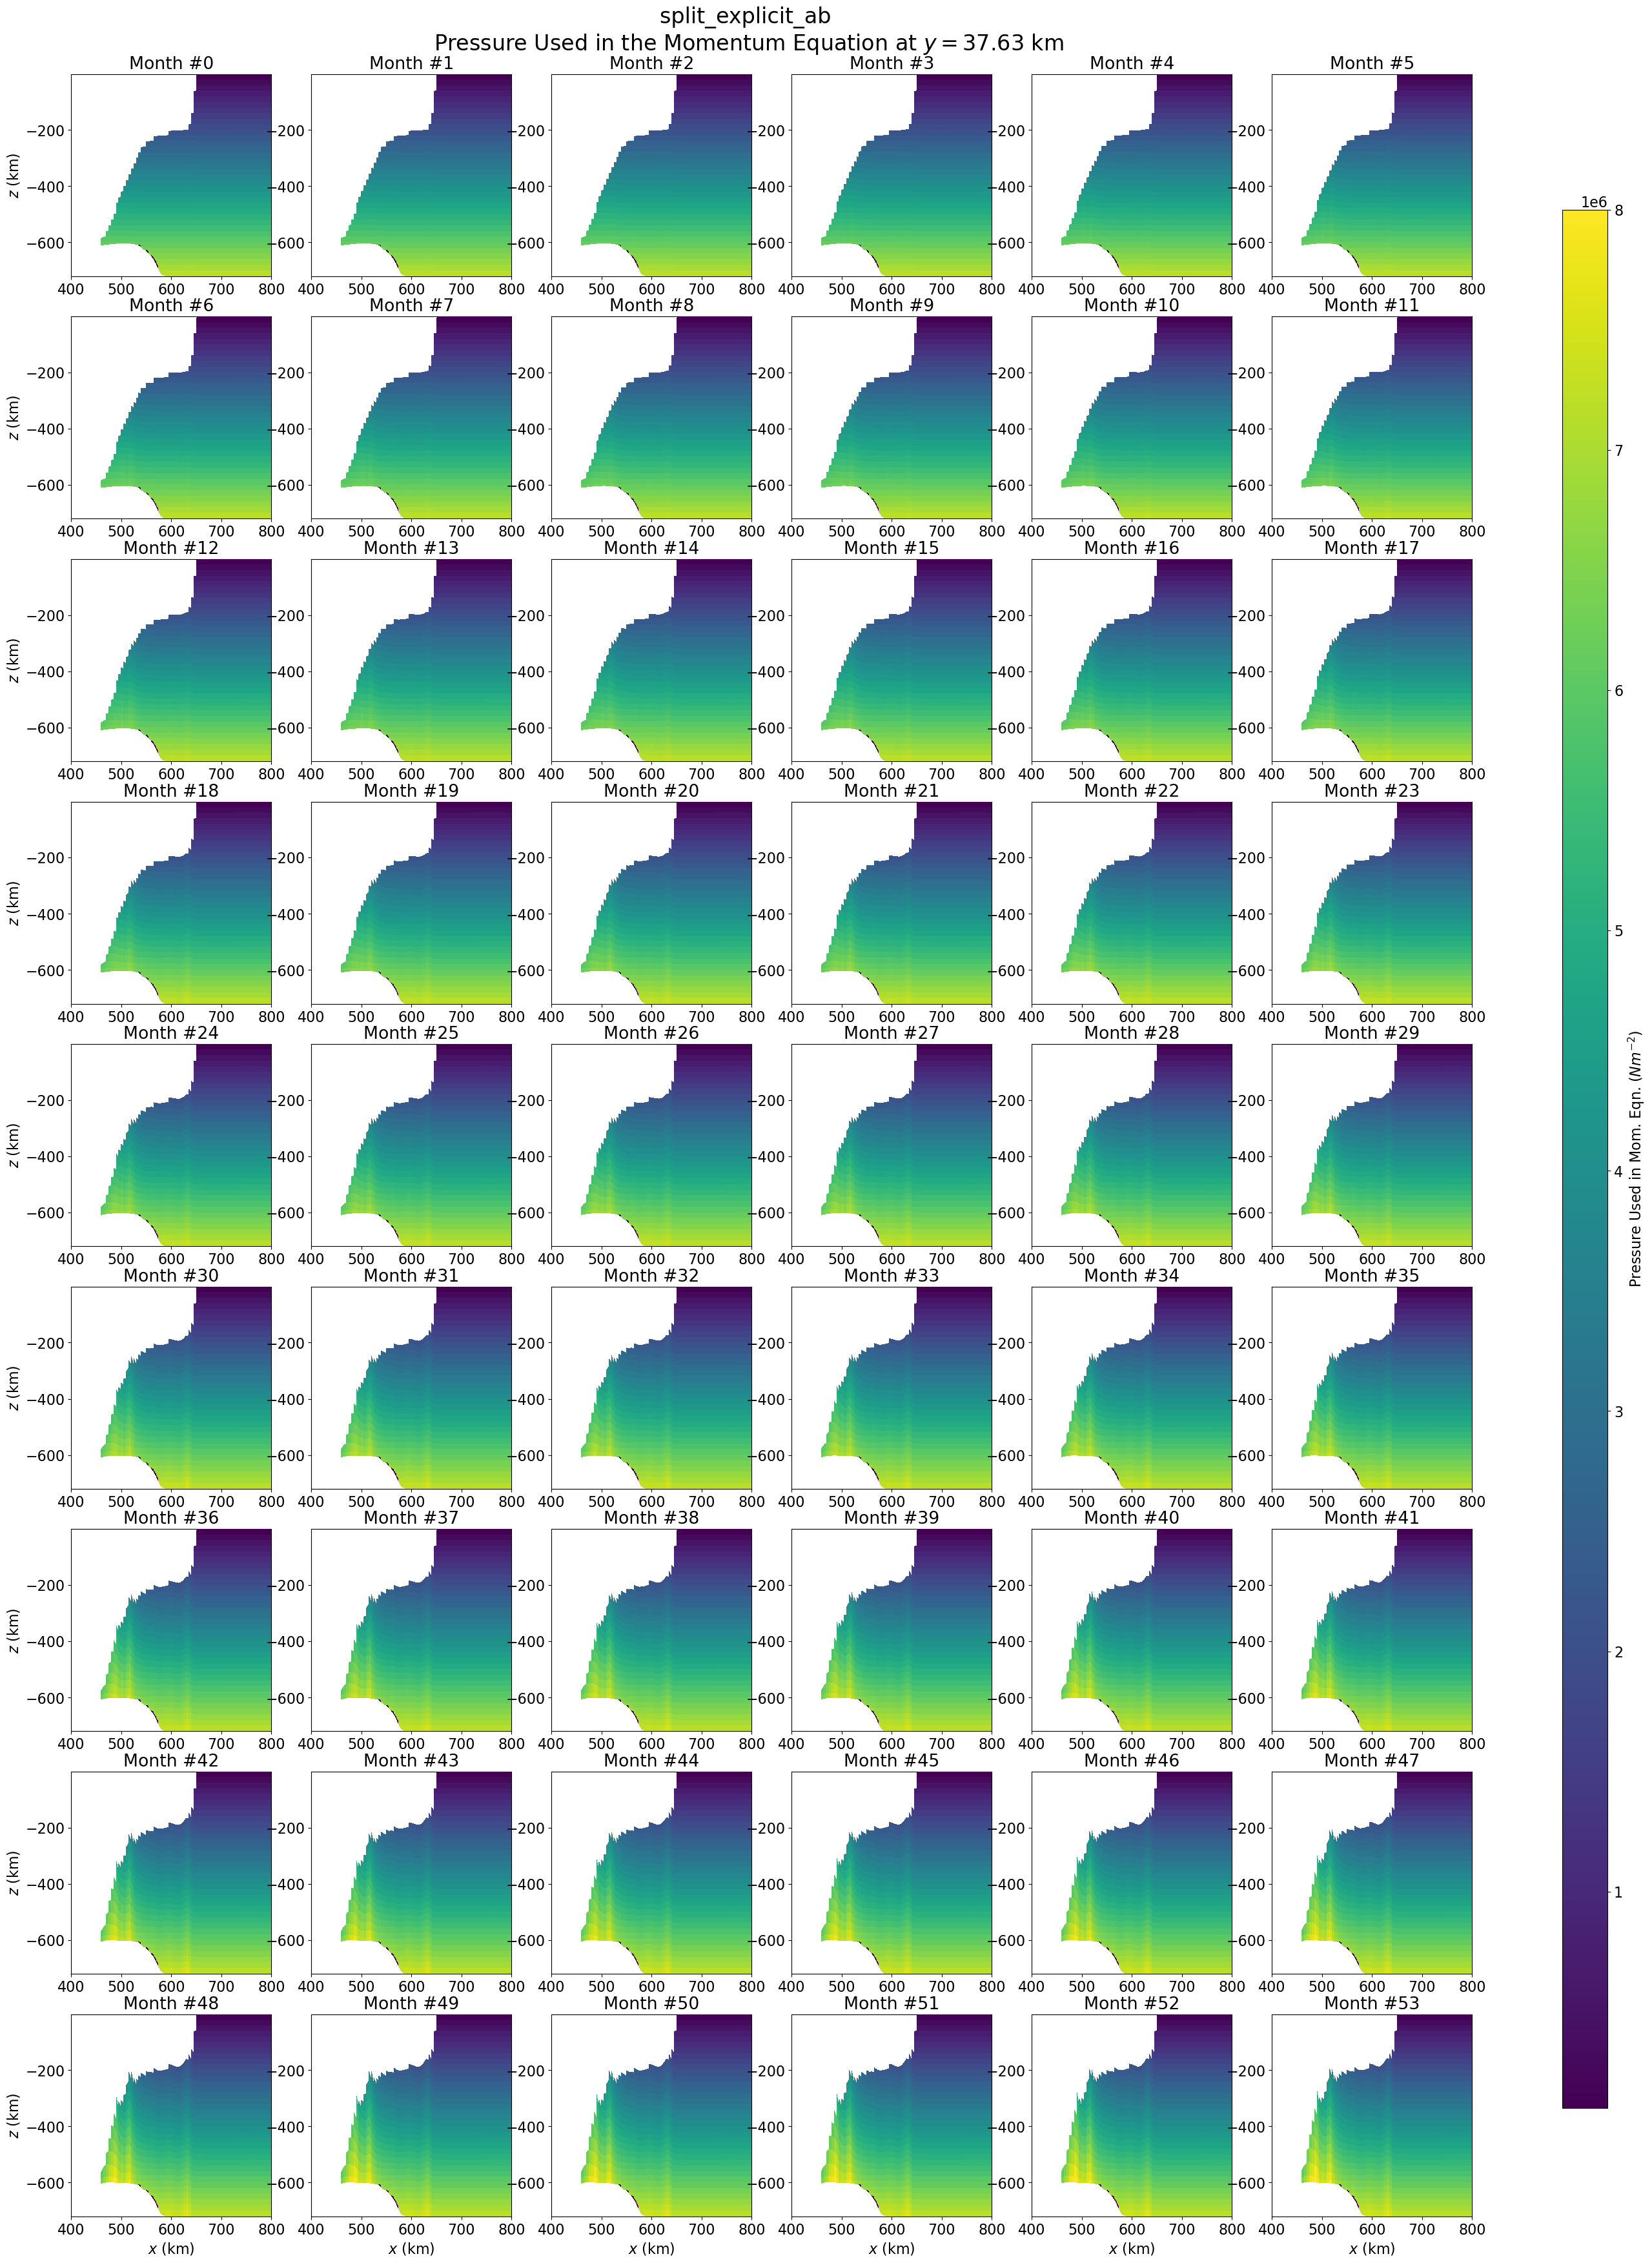

In [12]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(9,6, figsize=(28,42))

y_idx = 8
for r in np.arange(0,9,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=100000,vmax=8000000,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Pressure Used in Mom. Eqn. ($N m^{-2}$)')
fig.suptitle('split_explicit_ab \n'+r'Pressure Used in the Momentum Equation at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=24, ha='center', x = 0.5, y = 0.925)
plt.show()

/tmp/ipykernel_795308/3245867624.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_RK4.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_RK4.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),


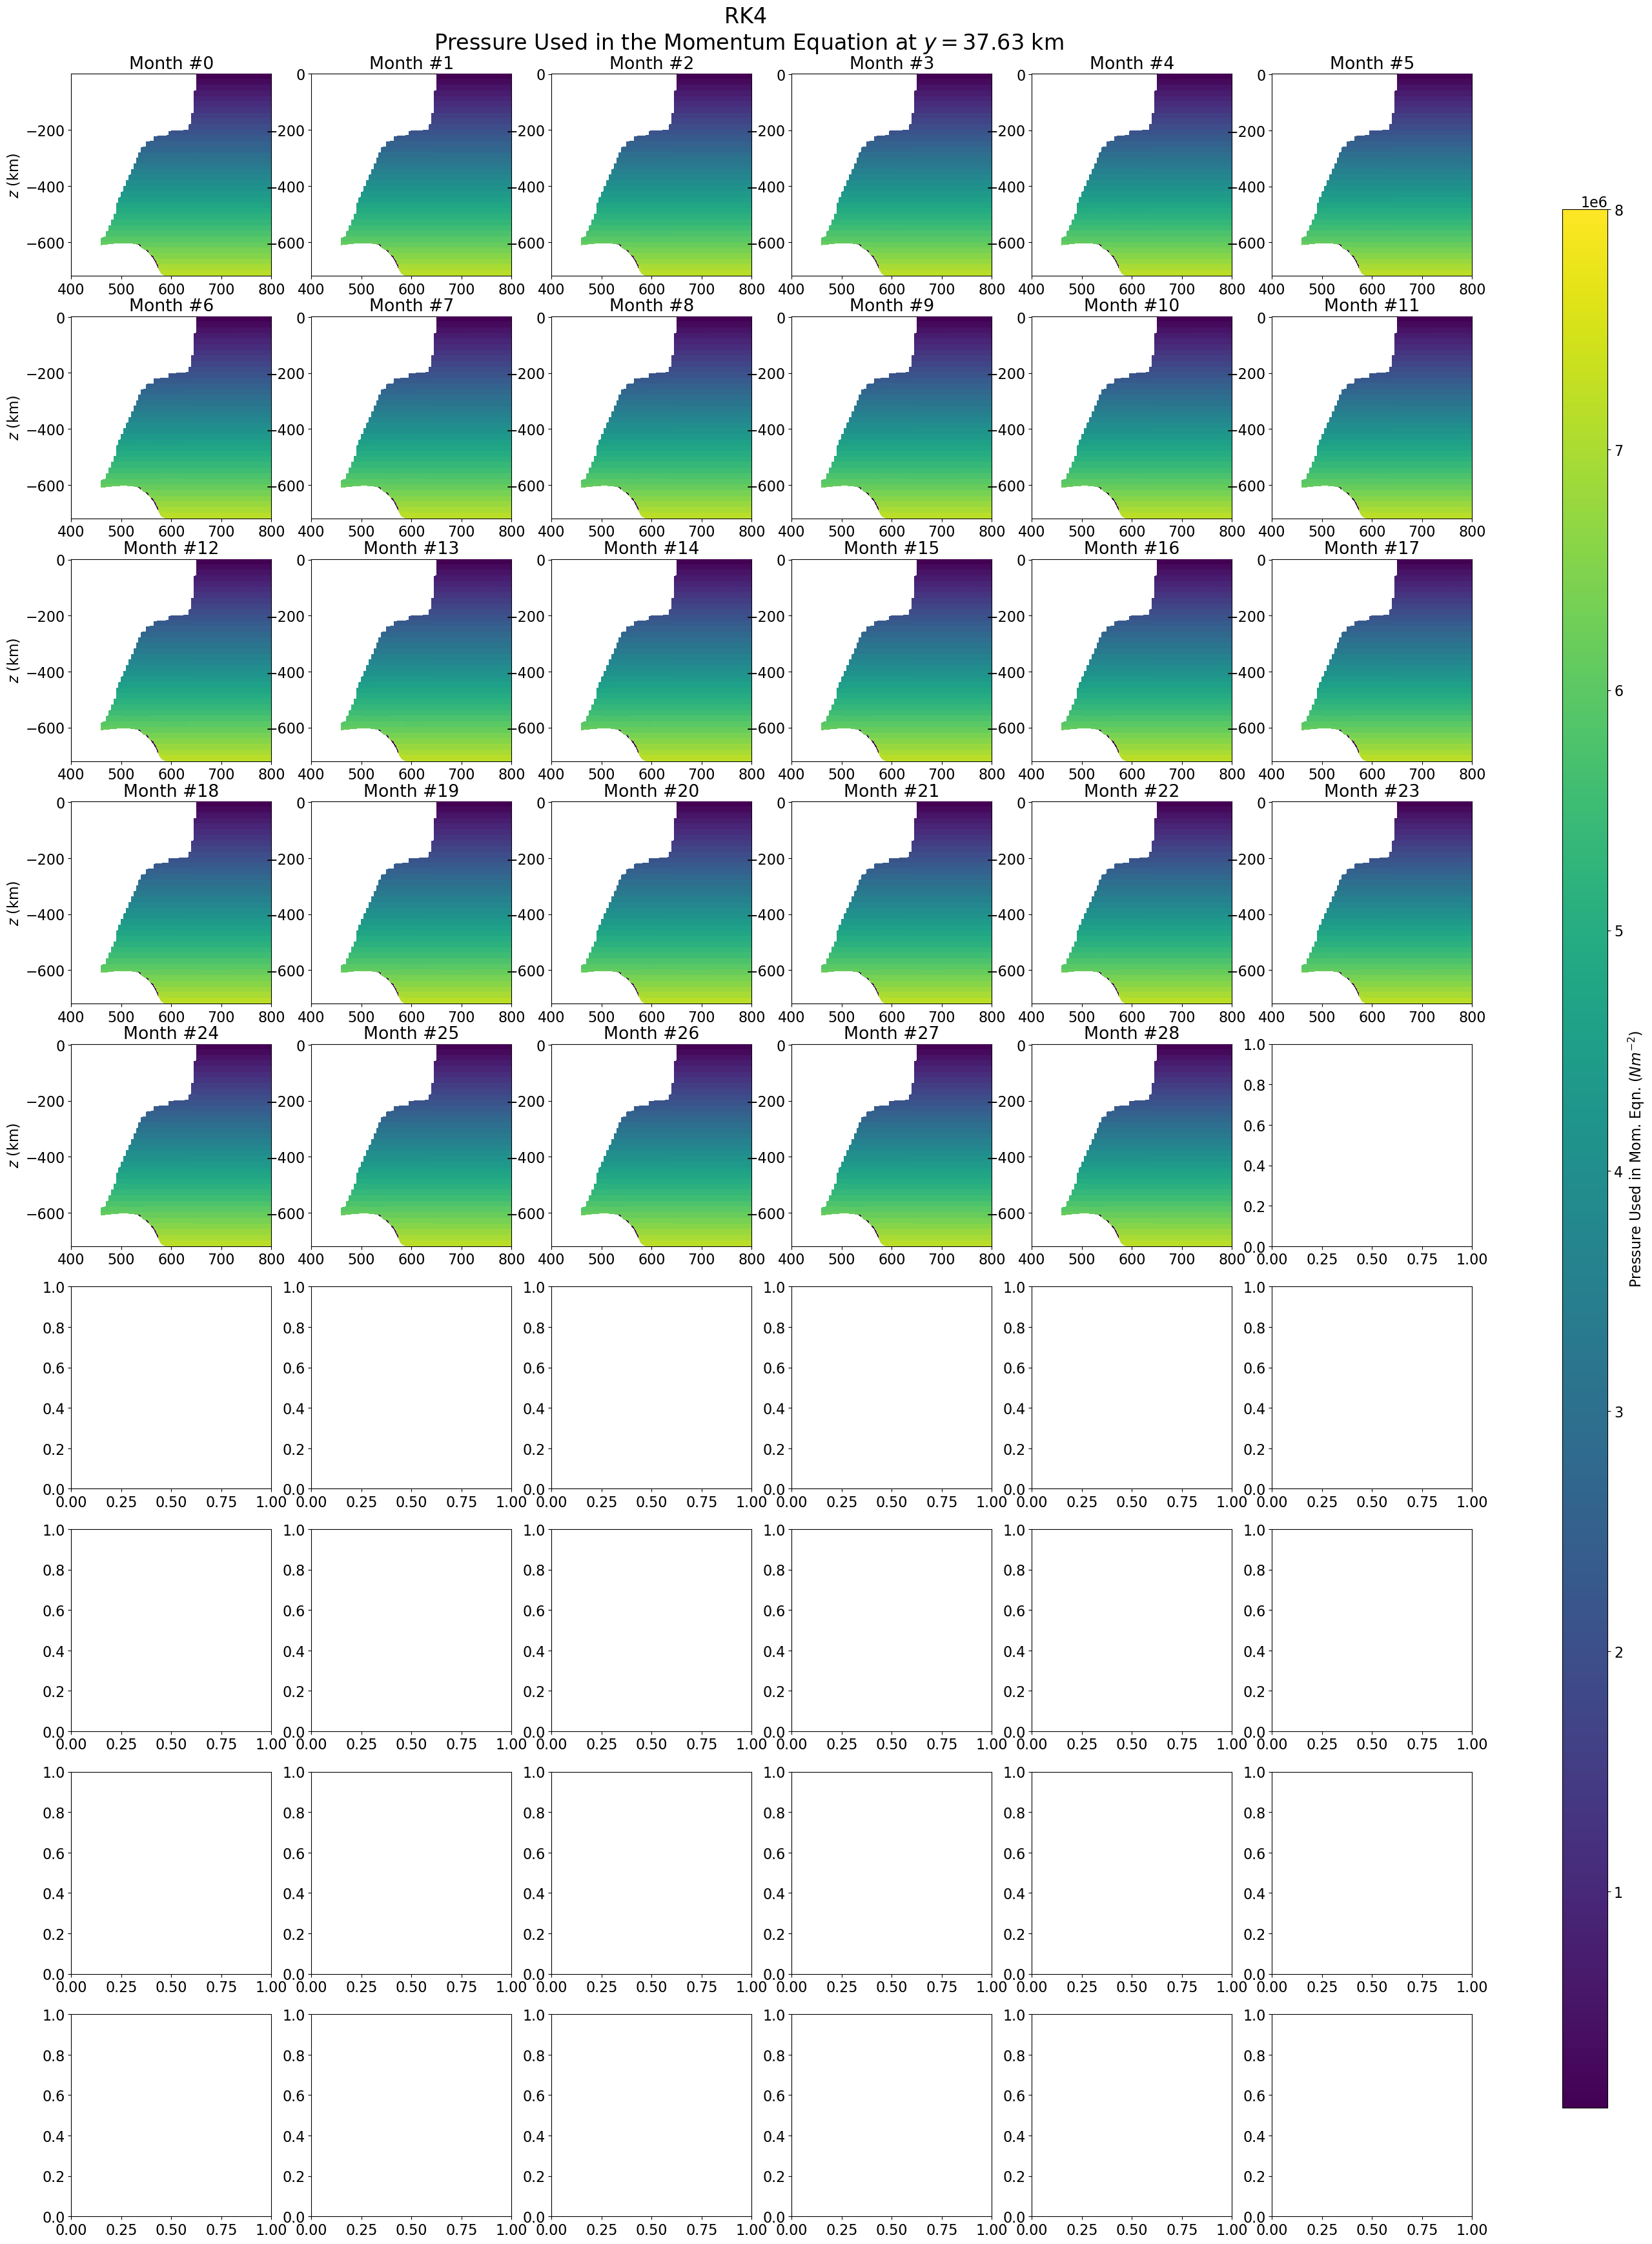

In [10]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(9,6, figsize=(28,42))

y_idx = 8
for r in np.arange(0,9,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output_RK4.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output_RK4.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_RK4.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_RK4.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=100000,vmax=8000000,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1
        if midx == len(ds_output_RK4.Time):
            break
            
    if midx == len(ds_output_RK4.Time):
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Pressure Used in Mom. Eqn. ($N m^{-2}$)')
fig.suptitle('RK4 \n'+r'Pressure Used in the Momentum Equation at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=24, ha='center', x = 0.5, y = 0.925)
plt.show()

In [41]:
ds_output

<xarray.Dataset> Size: 229MB
Dimensions:                         (Time: 59, nEdges: 3605, nVertLevels: 36,
                                     nCells: 1146, nVertLevelsP1: 37,
                                     nVertices: 2460, TWO: 2, maxEdges: 6,
                                     maxEdges2: 12, vertexDegree: 3)
Dimensions without coordinates: Time, nEdges, nVertLevels, nCells,
                                nVertLevelsP1, nVertices, TWO, maxEdges,
                                maxEdges2, vertexDegree
Data variables: (12/73)
    xtime                           (Time) |S64 4kB ...
    daysSinceStartOfSim             (Time) timedelta64[ns] 472B ...
    normalVelocity                  (Time, nEdges, nVertLevels) float64 61MB ...
    kineticEnergyCell               (Time, nCells, nVertLevels) float64 19MB ...
    vertVelocityTop                 (Time, nCells, nVertLevelsP1) float64 20MB ...
    layerThickness                  (Time, nCells, nVertLevels) float64 19MB ...
    ...                              ...
    fCell                           (nCells) float64 9kB ...
    bottomDepth                     (nCells) float64 9kB ...
    minLevelCell                    (nCells) int32 5kB ...
    maxLevelCell                    (nCells) int32 5kB ...
    refBottomDepth                  (nVertLevels) float64 288B ...
    restingThickness                (nCells, nVertLevels) float64 330kB ...
Attributes: (12/1312)
    model_name:                                                      mpas
    core_name:                                                       ocean
    source:                                                          MPAS
    Conventions:                                                     MPAS
    git_version:                                                     v3.0.0-1...
    on_a_sphere:                                                     NO
    ...                                                              ...
    config_rx1_slope_weight:                                         0.1
    config_rx1_zstar_weight:                                         1.0
    config_rx1_horiz_smooth_open_ocean_cells:                        20
    config_rx1_min_levels:                                           3
    config_rx1_min_layer_thickness:                                  1.0
    file_id:                                                         76zr9vodzq

## RK4

In [61]:
## load in the data
ds_init = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_RK4/ocean/isomip_plus/planar/5km/z-level/Ocean0/ssh_adjustment/adjusting_init.nc')
ds_init0 = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_RK4/ocean/isomip_plus/planar/5km/z-level/Ocean0/ssh_adjustment/adjusting_init0.nc')

In [76]:
ds_init

<xarray.Dataset> Size: 5MB
Dimensions:                    (nEdges: 3605, maxEdges2: 12, TWO: 2,
                                nVertices: 2460, vertexDegree: 3, nCells: 1146,
                                nVertLevels: 36, maxEdges: 6,
                                nVertLevelsP1: 37, Time: 1)
Dimensions without coordinates: nEdges, maxEdges2, TWO, nVertices,
                                vertexDegree, nCells, nVertLevels, maxEdges,
                                nVertLevelsP1, Time
Data variables: (12/77)
    edgesOnEdge                (nEdges, maxEdges2) int32 173kB ...
    weightsOnEdge              (nEdges, maxEdges2) float64 346kB ...
    cellsOnEdge                (nEdges, TWO) int32 29kB ...
    verticesOnEdge             (nEdges, TWO) int32 29kB ...
    latEdge                    (nEdges) float64 29kB ...
    lonEdge                    (nEdges) float64 29kB ...
    ...                         ...
    restingThickness           (Time, nCells, nVertLevels) float64 330kB ...
    zMid                       (Time, nCells, nVertLevels) float64 330kB ...
    frac                       (Time, nCells, nVertLevels) float64 330kB ...
    temperature                (Time, nCells, nVertLevels) float64 330kB ...
    salinity                   (Time, nCells, nVertLevels) float64 330kB ...
    normalVelocity             (Time, nEdges, nVertLevels) float64 1MB ...
Attributes:
    on_a_sphere:    NO
    sphere_radius:  0.0
    is_periodic:    NO
    parent_id:      yifle2mylx
    history:        Thu Jun 13 14:25:23 2024: /global/u2/m/mlarson/miniforge3...
    mesh_spec:      1.0
    Conventions:    MPAS
    source:         MpasMeshConverter.x
    file_id:        yevbttqm1q

In [62]:
ds_init == ds_init0

<xarray.Dataset> Size: 670kB
Dimensions:                    (nEdges: 3605, maxEdges2: 12, TWO: 2,
                                nVertices: 2460, vertexDegree: 3, nCells: 1146,
                                nVertLevels: 36, maxEdges: 6,
                                nVertLevelsP1: 37, Time: 1)
Dimensions without coordinates: nEdges, maxEdges2, TWO, nVertices,
                                vertexDegree, nCells, nVertLevels, maxEdges,
                                nVertLevelsP1, Time
Data variables: (12/77)
    edgesOnEdge                (nEdges, maxEdges2) bool 43kB True True ... True
    weightsOnEdge              (nEdges, maxEdges2) bool 43kB True True ... True
    cellsOnEdge                (nEdges, TWO) bool 7kB True True ... True True
    verticesOnEdge             (nEdges, TWO) bool 7kB True True ... True True
    latEdge                    (nEdges) bool 4kB True True True ... True True
    lonEdge                    (nEdges) bool 4kB True True True ... True True
    ...                         ...
    restingThickness           (Time, nCells, nVertLevels) bool 41kB False .....
    zMid                       (Time, nCells, nVertLevels) bool 41kB False .....
    frac                       (Time, nCells, nVertLevels) bool 41kB False .....
    temperature                (Time, nCells, nVertLevels) bool 41kB False .....
    salinity                   (Time, nCells, nVertLevels) bool 41kB False .....
    normalVelocity             (Time, nEdges, nVertLevels) bool 130kB True .....

/tmp/ipykernel_1354328/2083615466.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_init0.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_init0.temperature.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),
/tmp/ipykernel_1354328/2083615466.py:33: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Temperature (c)')


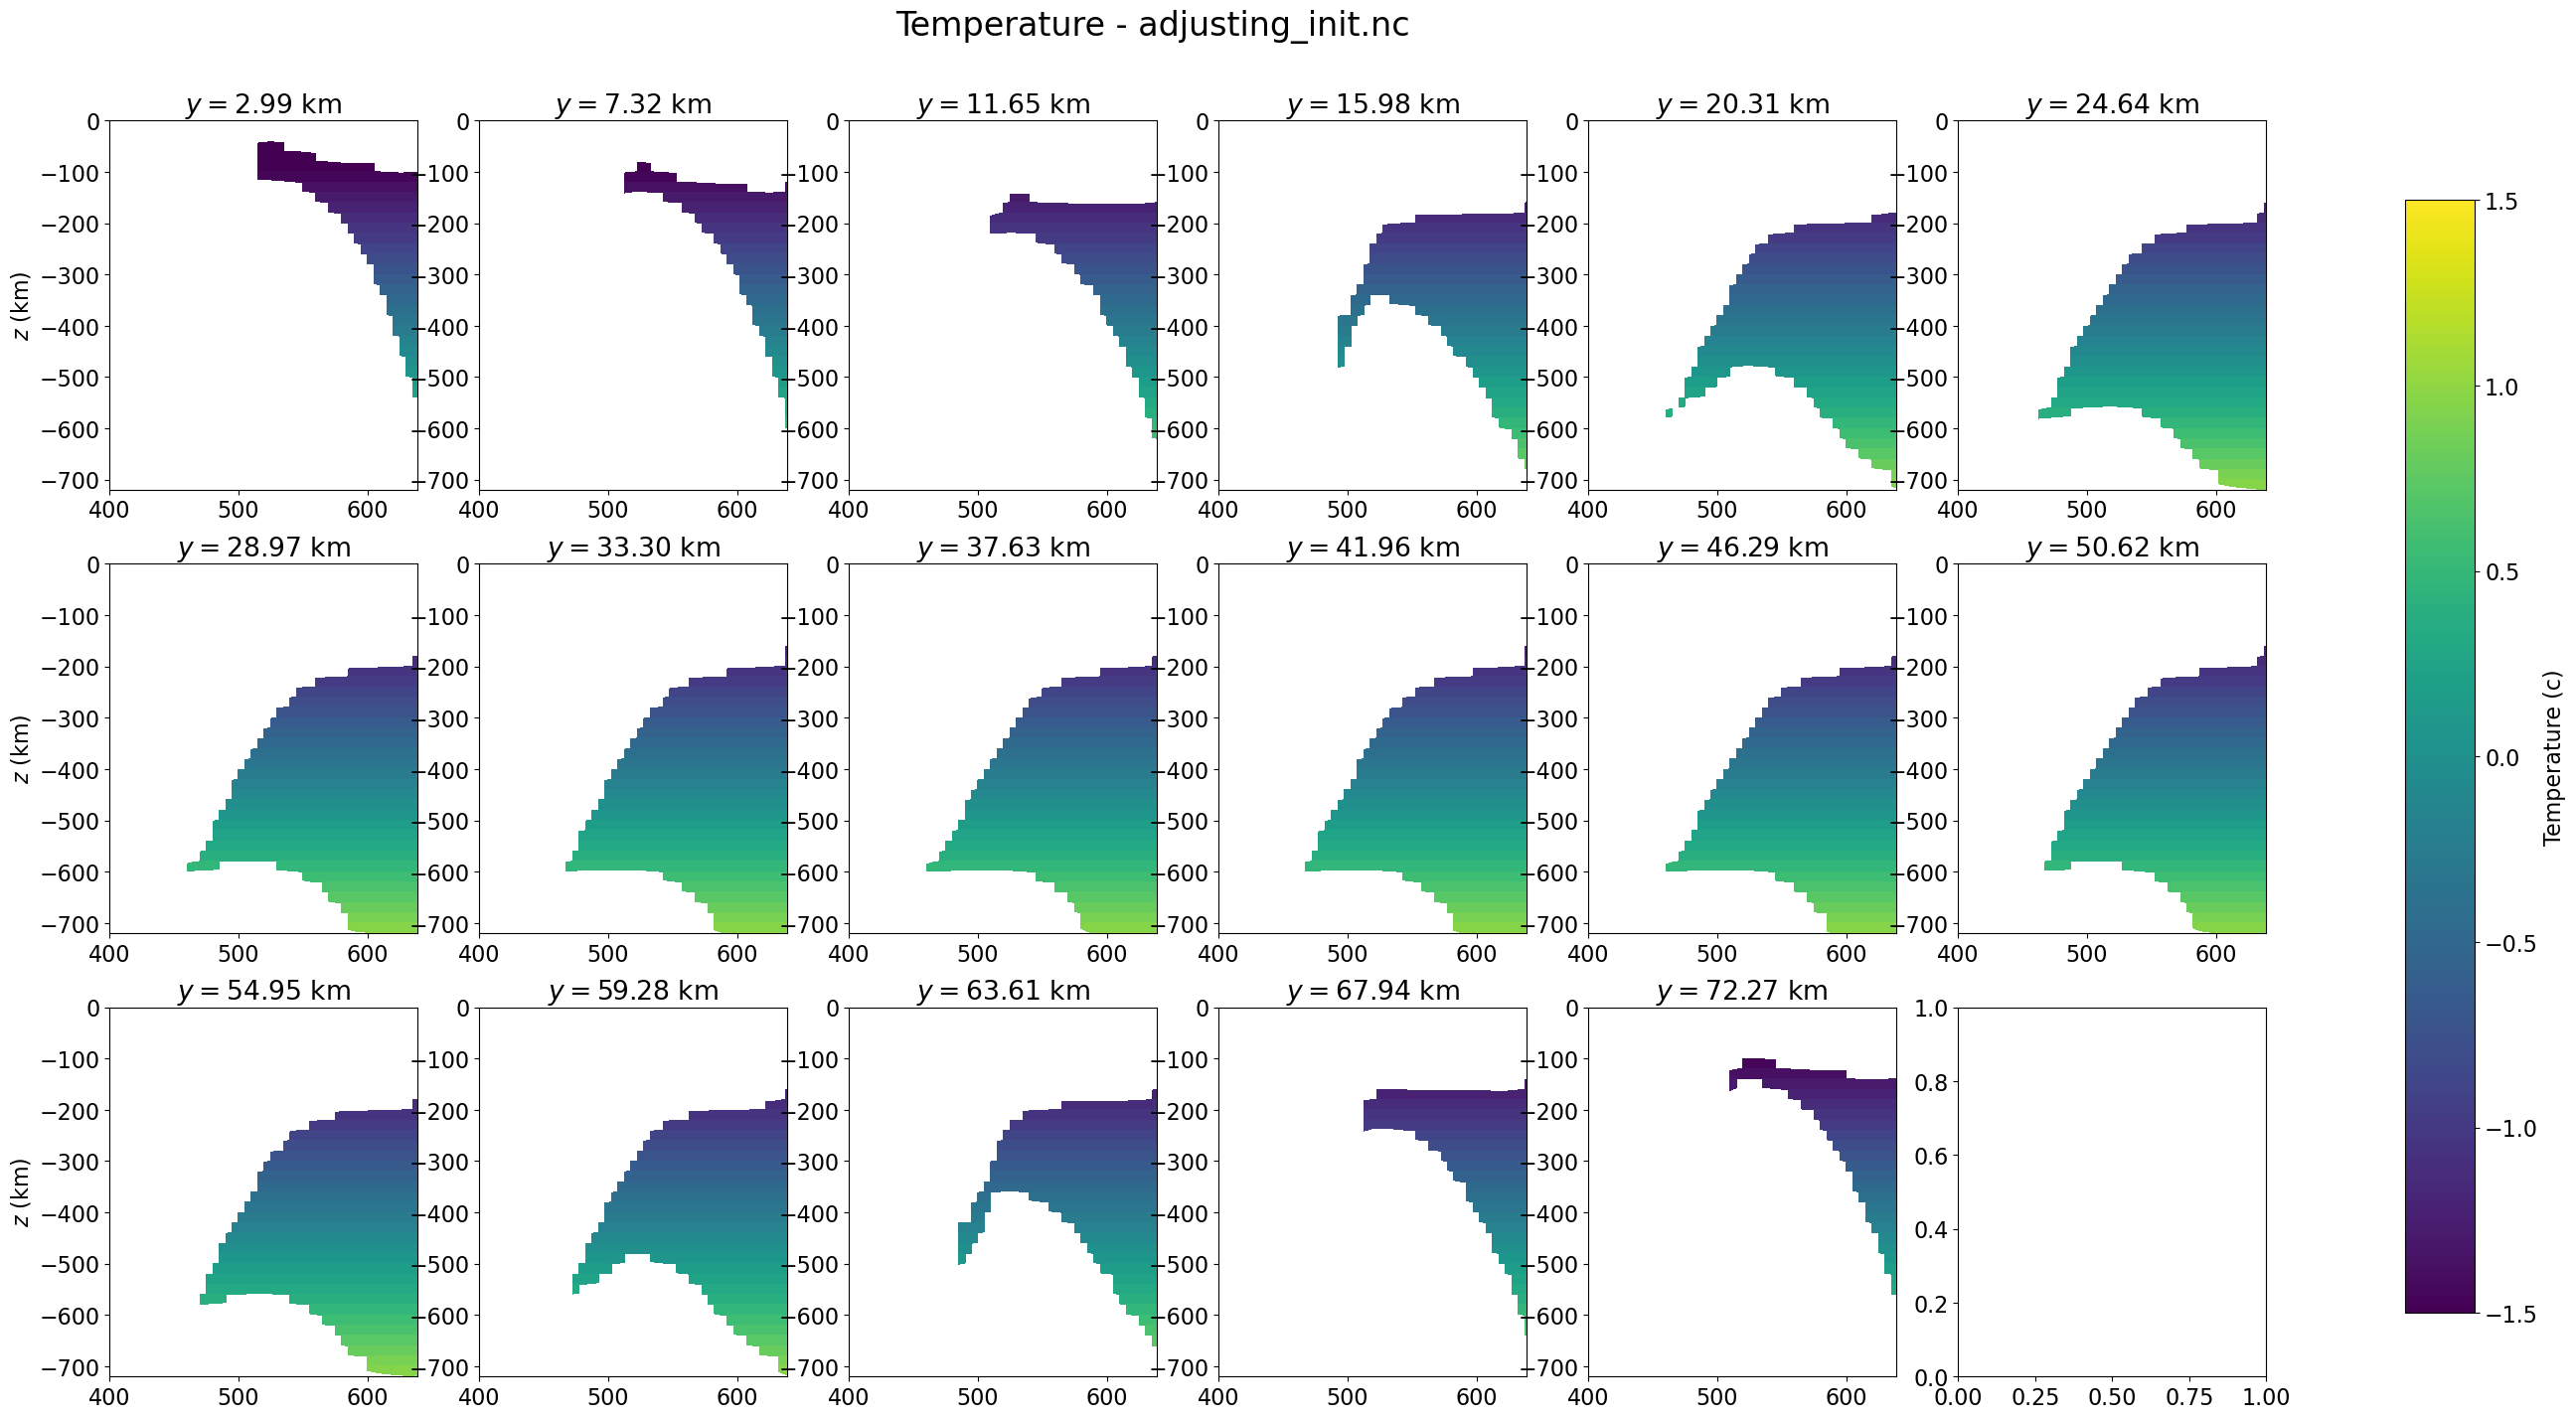

In [75]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(3,6, figsize=(28,16))

y_idx = 0
for r in np.arange(0,3,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_init0.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_init0.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_init0.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_init0.temperature.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=-1.5,vmax=1.5,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('$y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km')
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400,xmax=639)
        
        y_idx+=1
        if y_idx == 17:
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Temperature (c)')
fig.suptitle(r'Temperature - adjusting_init.nc', size=24, ha='center', x = 0.5, y = 0.97)
plt.show()

/tmp/ipykernel_1354328/3841810610.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_init0.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_init0.salinity.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),
/tmp/ipykernel_1354328/3841810610.py:33: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Salinity ()')


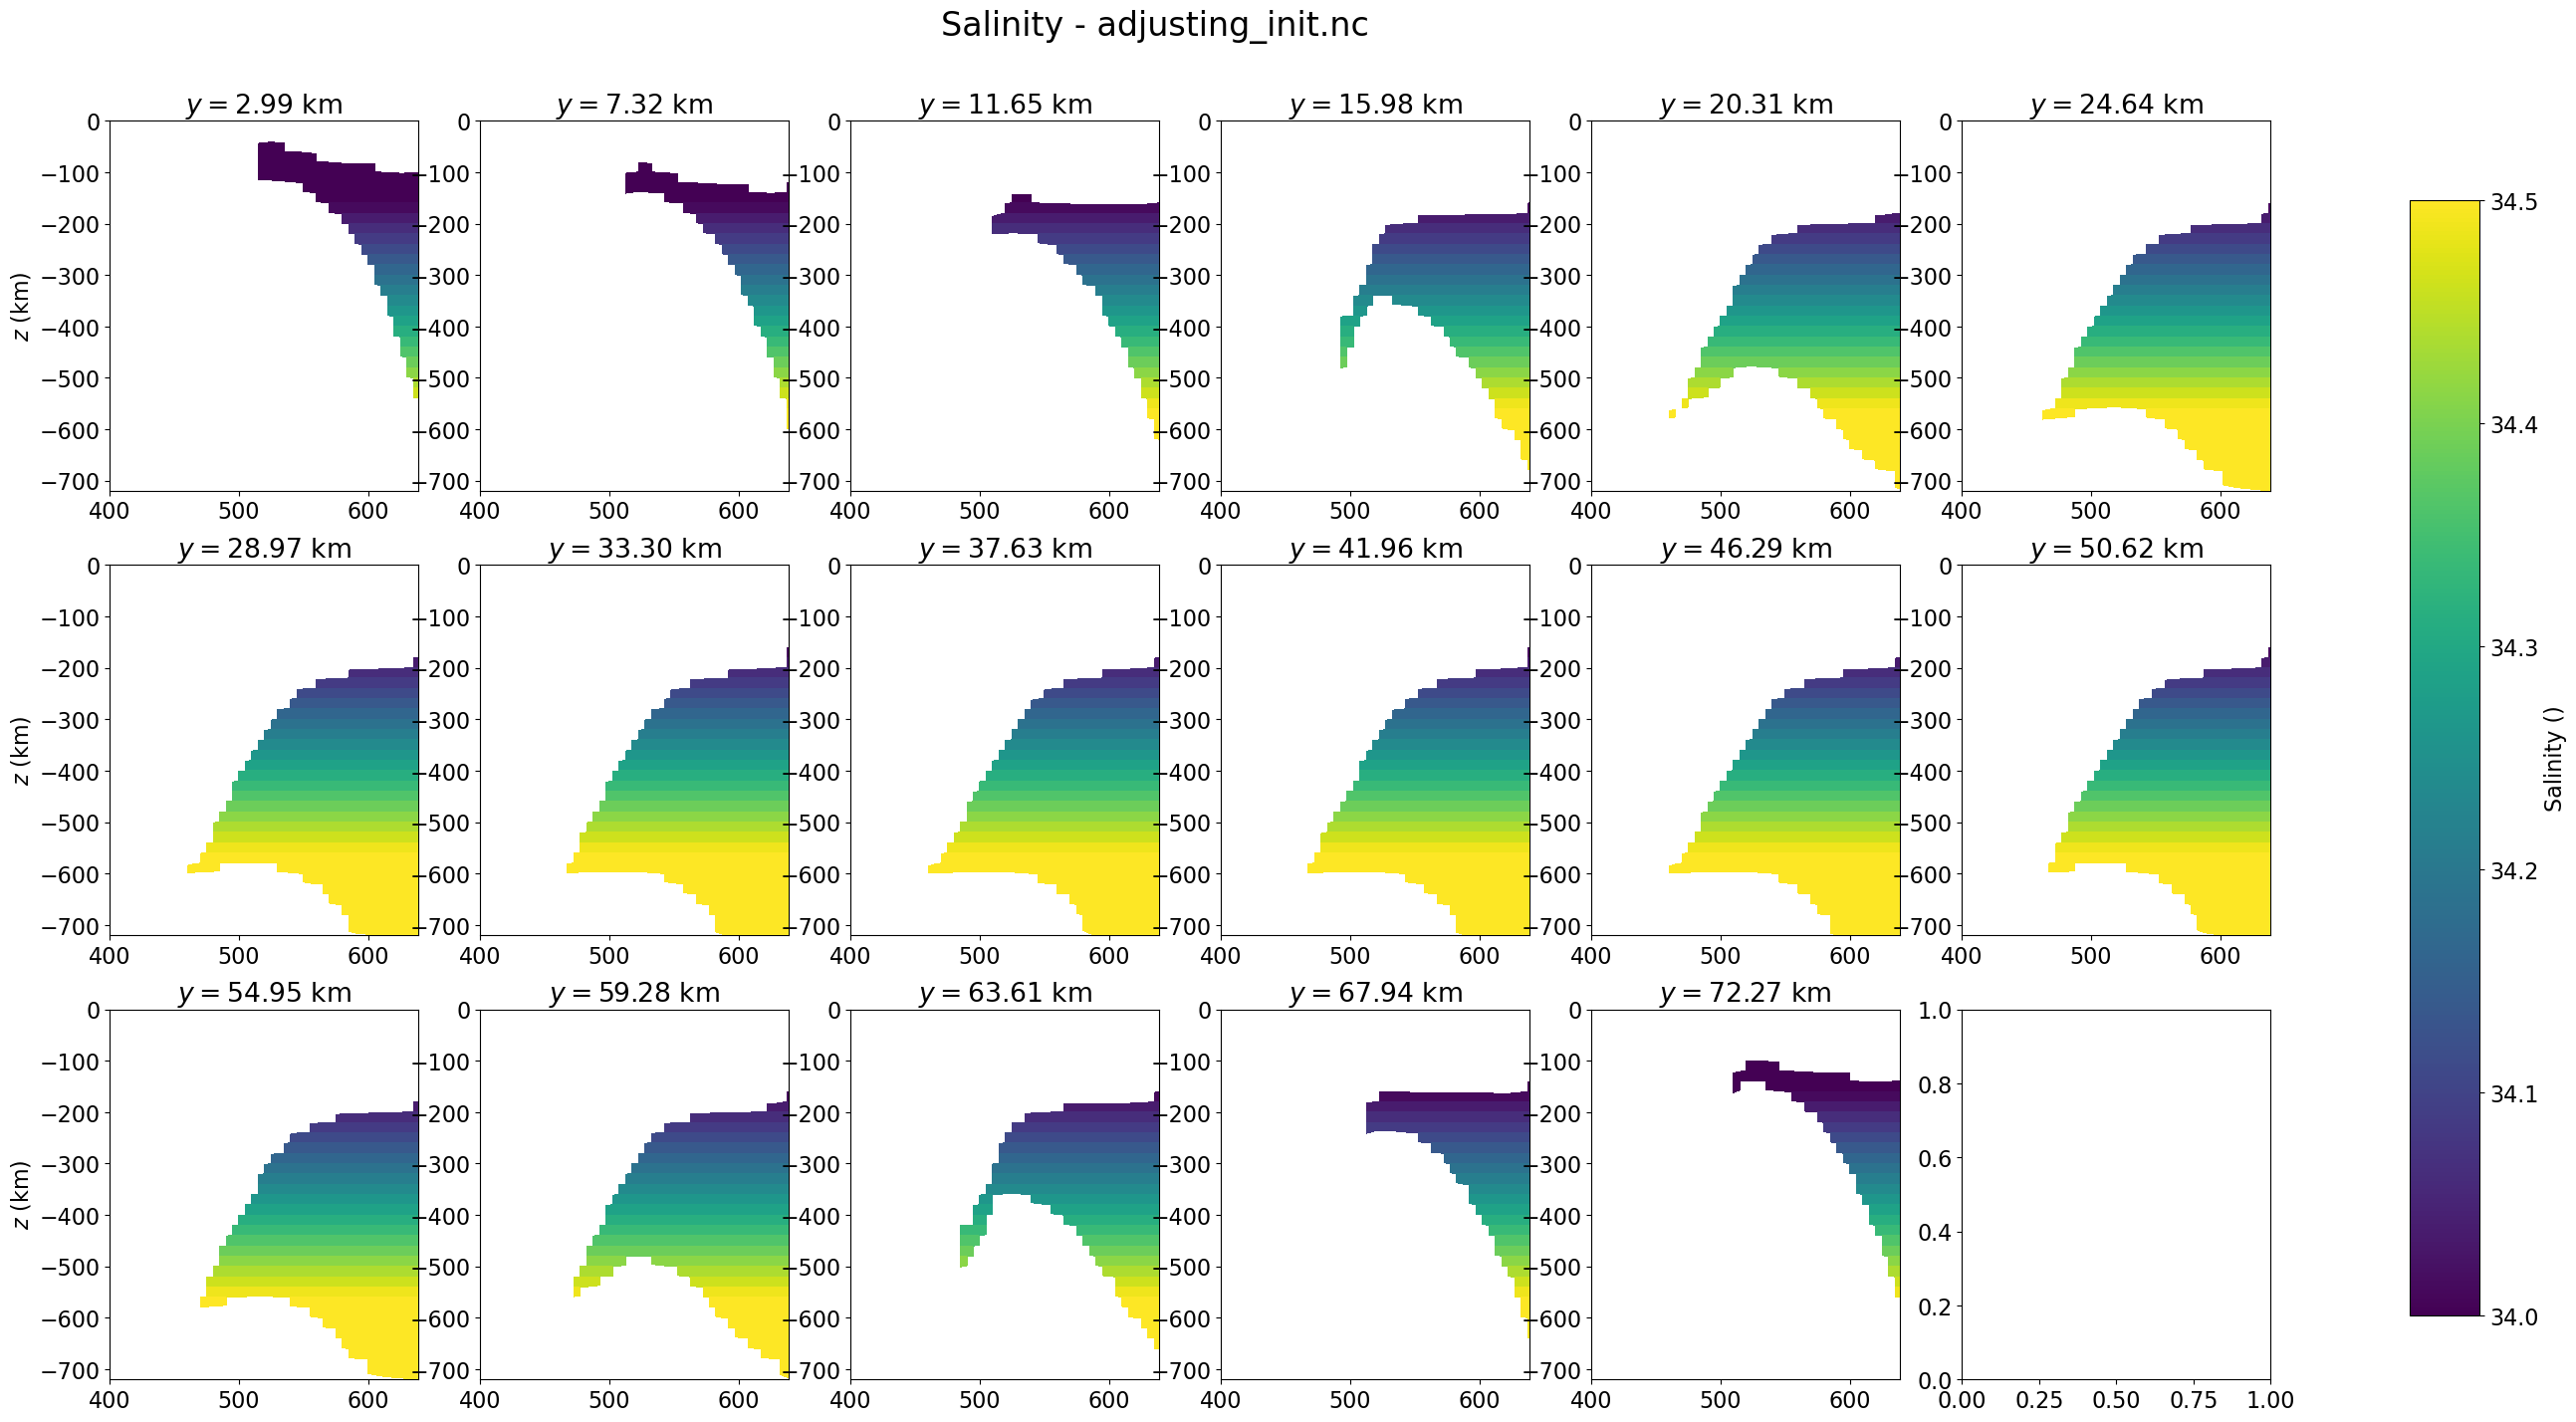

In [82]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(3,6, figsize=(28,16))

y_idx = 0
for r in np.arange(0,3,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_init0.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_init0.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_init0.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_init0.salinity.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=34,vmax=34.5,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('$y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km')
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400,xmax=639)
        
        y_idx+=1
        if y_idx == 17:
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Salinity ()')
fig.suptitle(r'Salinity - adjusting_init.nc', size=24, ha='center', x = 0.5, y = 0.97)
plt.show()

## Turning off terms that impact the pressure gradient
disable vel_pgrad:

In [43]:
ds_land_ice_fluxes_vel_pgrad = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_pgrad/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/land_ice_fluxes.nc')
ds_output_vel_pgrad = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_pgrad/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/output.nc')
ds_timeMonthly_vel_pgrad = xr.open_mfdataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_pgrad/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/timeSeriesStatsMonthly.*.nc')

/tmp/ipykernel_795308/1311330598.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_pgrad.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_pgrad.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),


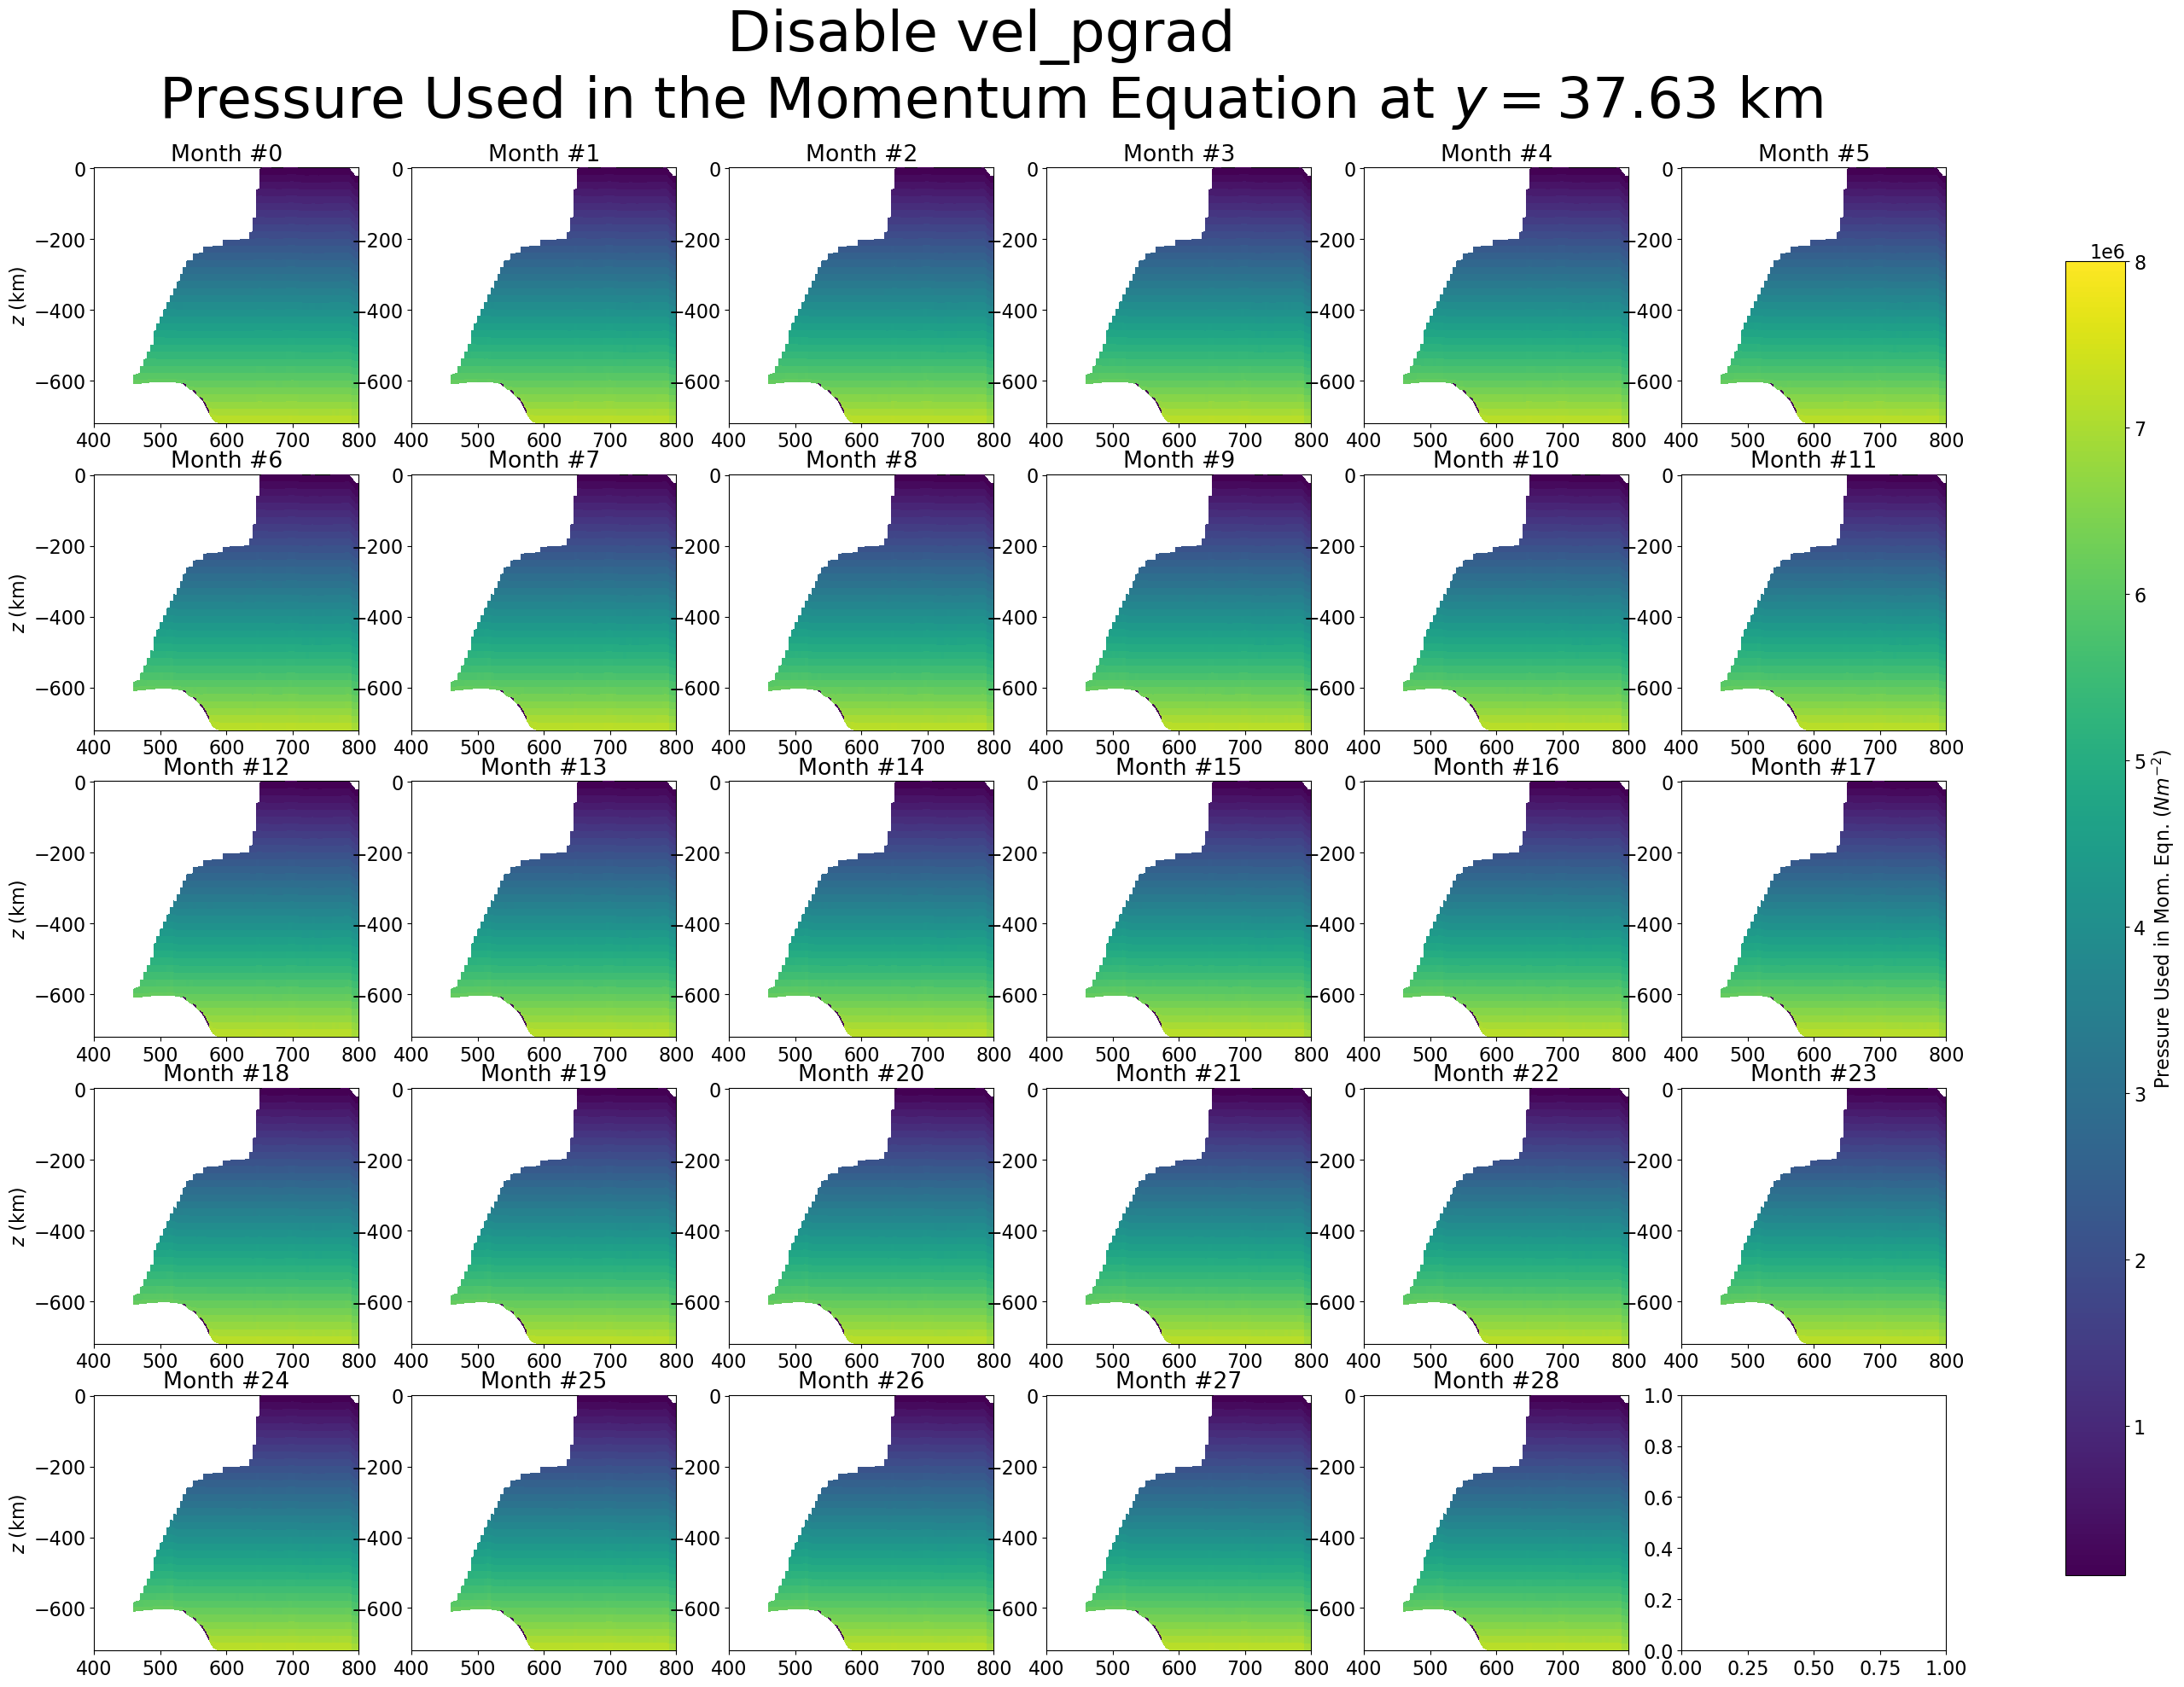

In [35]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(5,6, figsize=(28,22))

y_idx = 8
for r in np.arange(0,5,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output_vel_pgrad.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output_vel_pgrad.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_pgrad.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_pgrad.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=100000,vmax=8000000,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 5:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1
        if midx == len(ds_output_RK4.Time):
            break
            
    if midx == len(ds_output_RK4.Time):
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Pressure Used in Mom. Eqn. ($N m^{-2}$)')
fig.suptitle('Disable vel_pgrad \n'+r'Pressure Used in the Momentum Equation at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=48, ha='center', x = 0.5, y = 0.985)
plt.show()

/tmp/ipykernel_795308/2515678483.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_pgrad.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_pgrad.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),
/tmp/ipykernel_795308/2515678483.py:37: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')


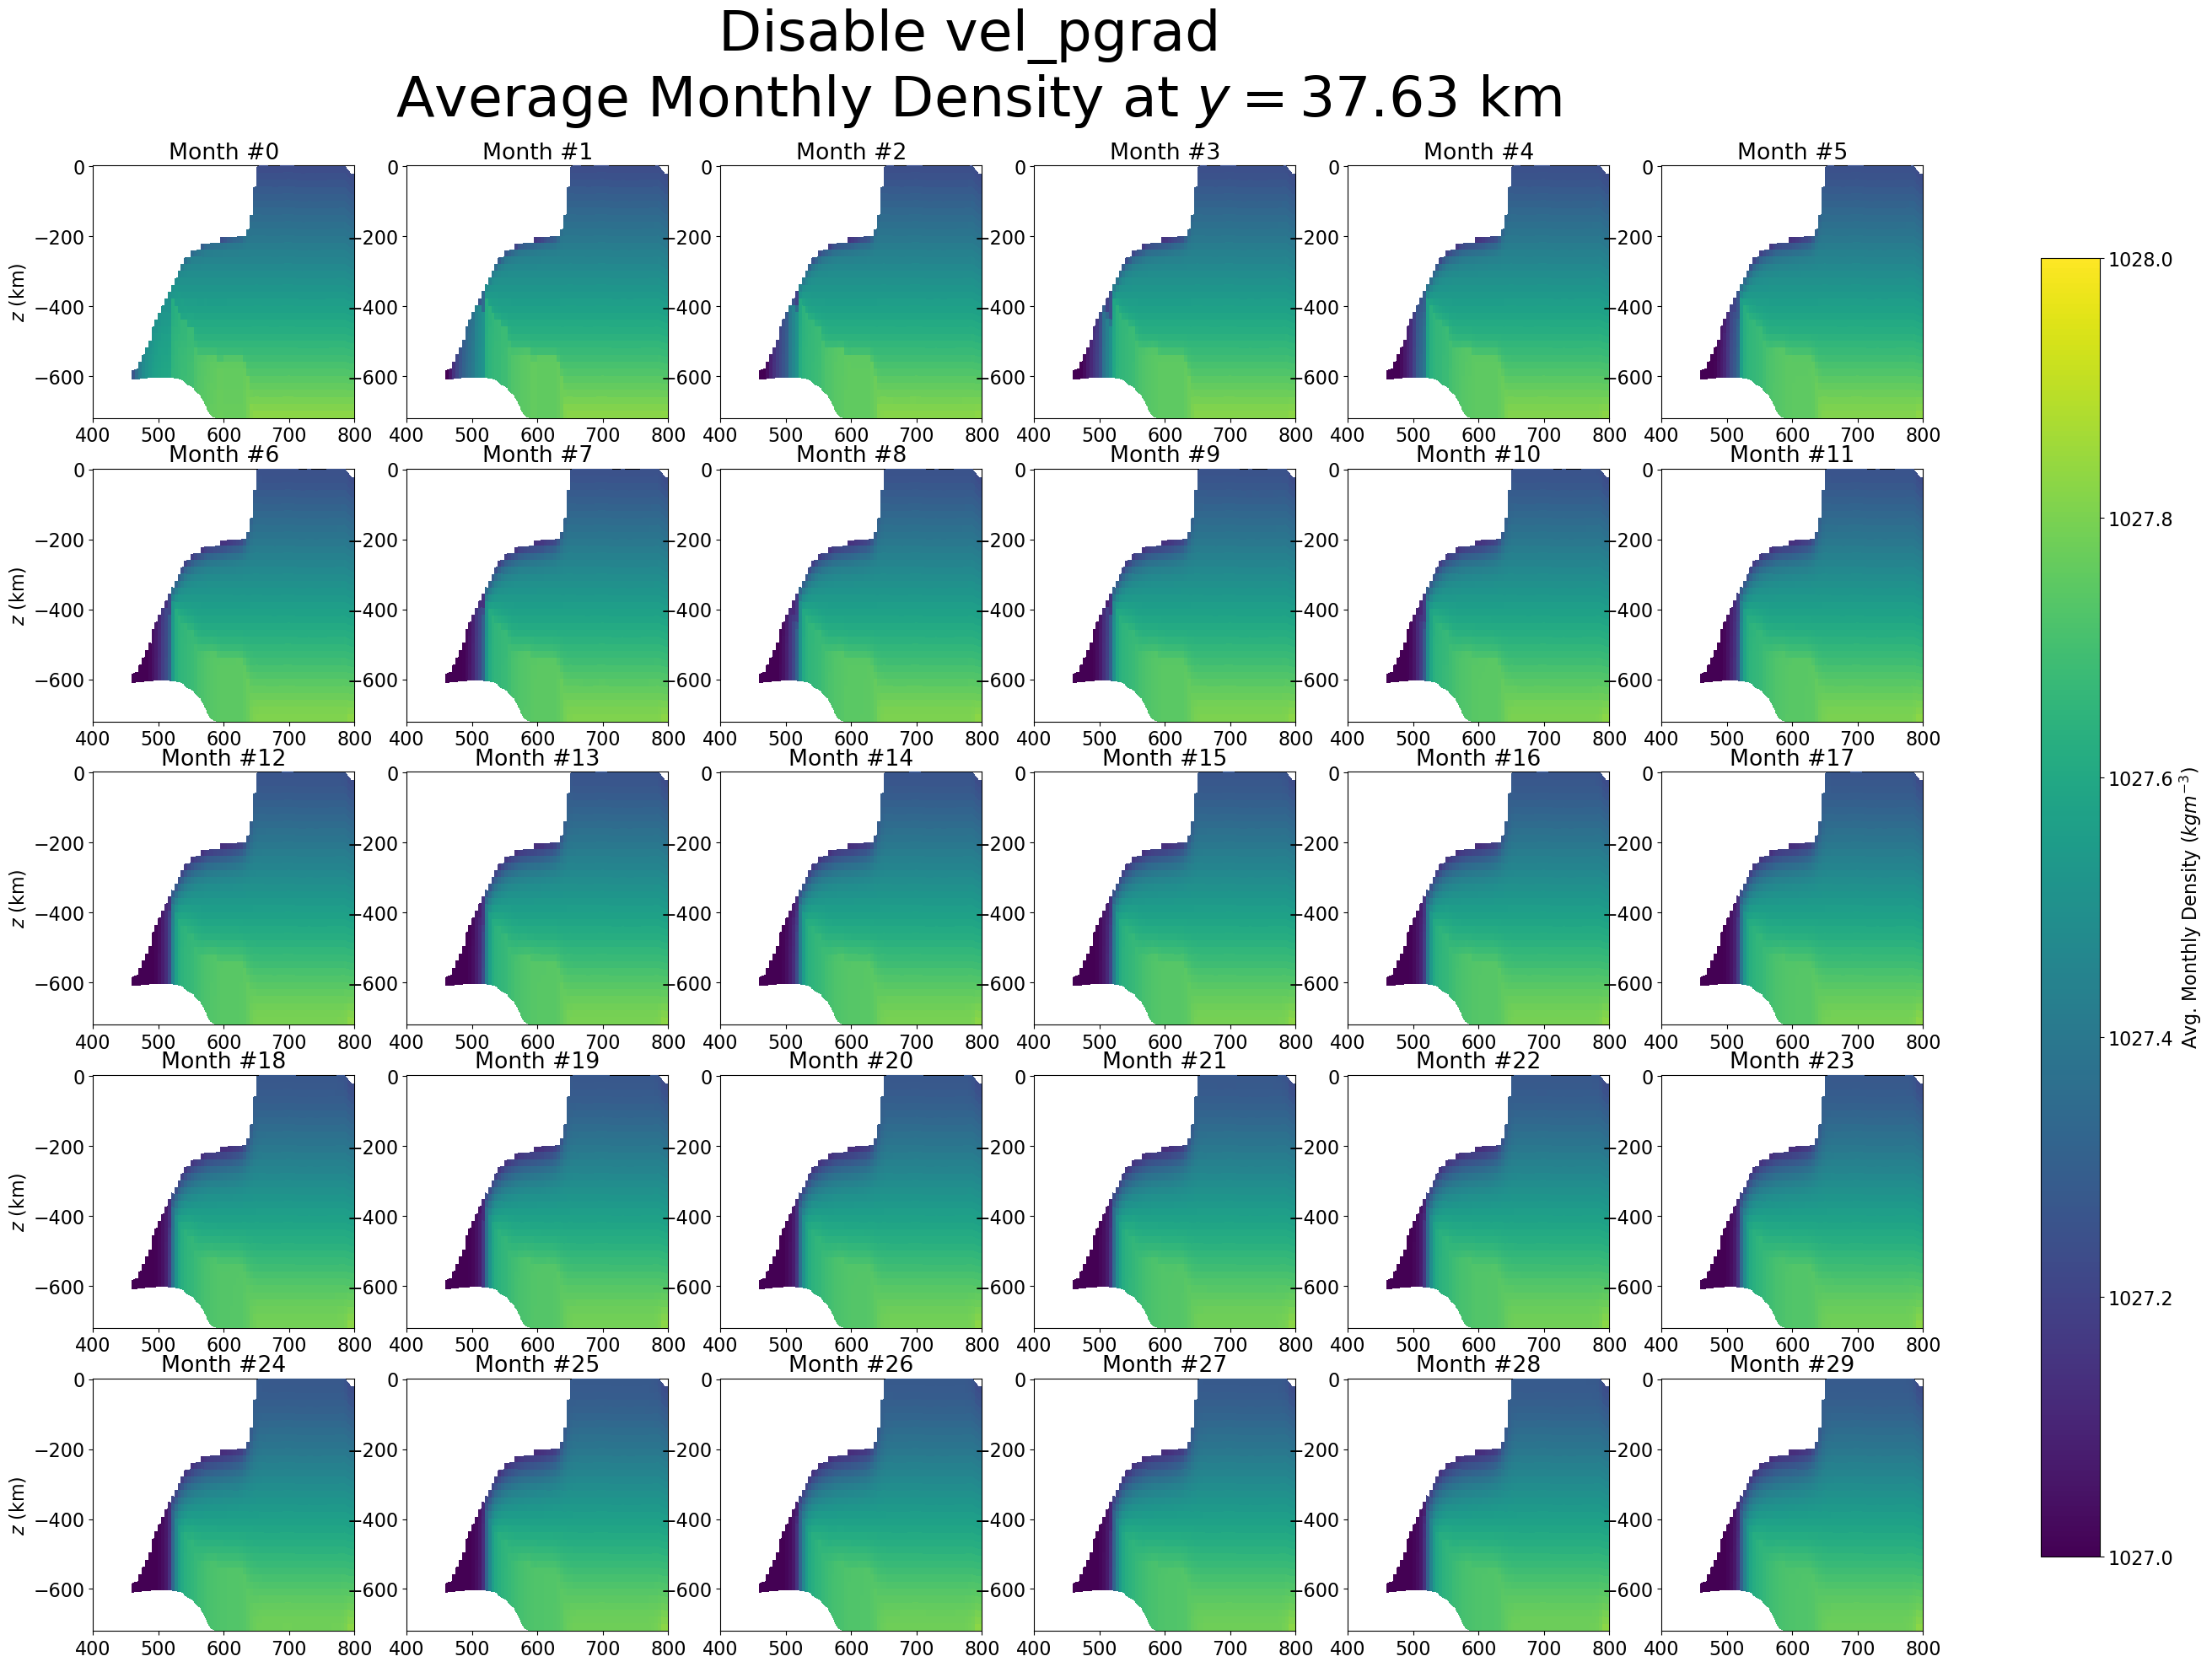

In [44]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(5,6, figsize=(28,22))

y_idx = 8
for r in np.arange(0,5,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output_vel_pgrad.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output_vel_pgrad.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_pgrad.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_pgrad.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=1027,vmax=1028,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 5:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1
        
        if midx == len(ds_output_vel_pgrad.Time):
            break
            
    if midx == len(ds_output_vel_pgrad.Time):
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')
fig.suptitle('Disable vel_pgrad \n'+r'Average Monthly Density at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=48, ha='center', x = 0.5, y = 0.985)
plt.show()

disable vel_hmix:

In [22]:
ds_land_ice_fluxes_vel_hmix = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_hmix/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/land_ice_fluxes.nc')
ds_output_vel_hmix = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_hmix/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/output.nc')
ds_timeMonthly_vel_hmix = xr.open_mfdataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_hmix/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/timeSeriesStatsMonthly.*.nc')

/tmp/ipykernel_795308/1646289494.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_hmix.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_hmix.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),


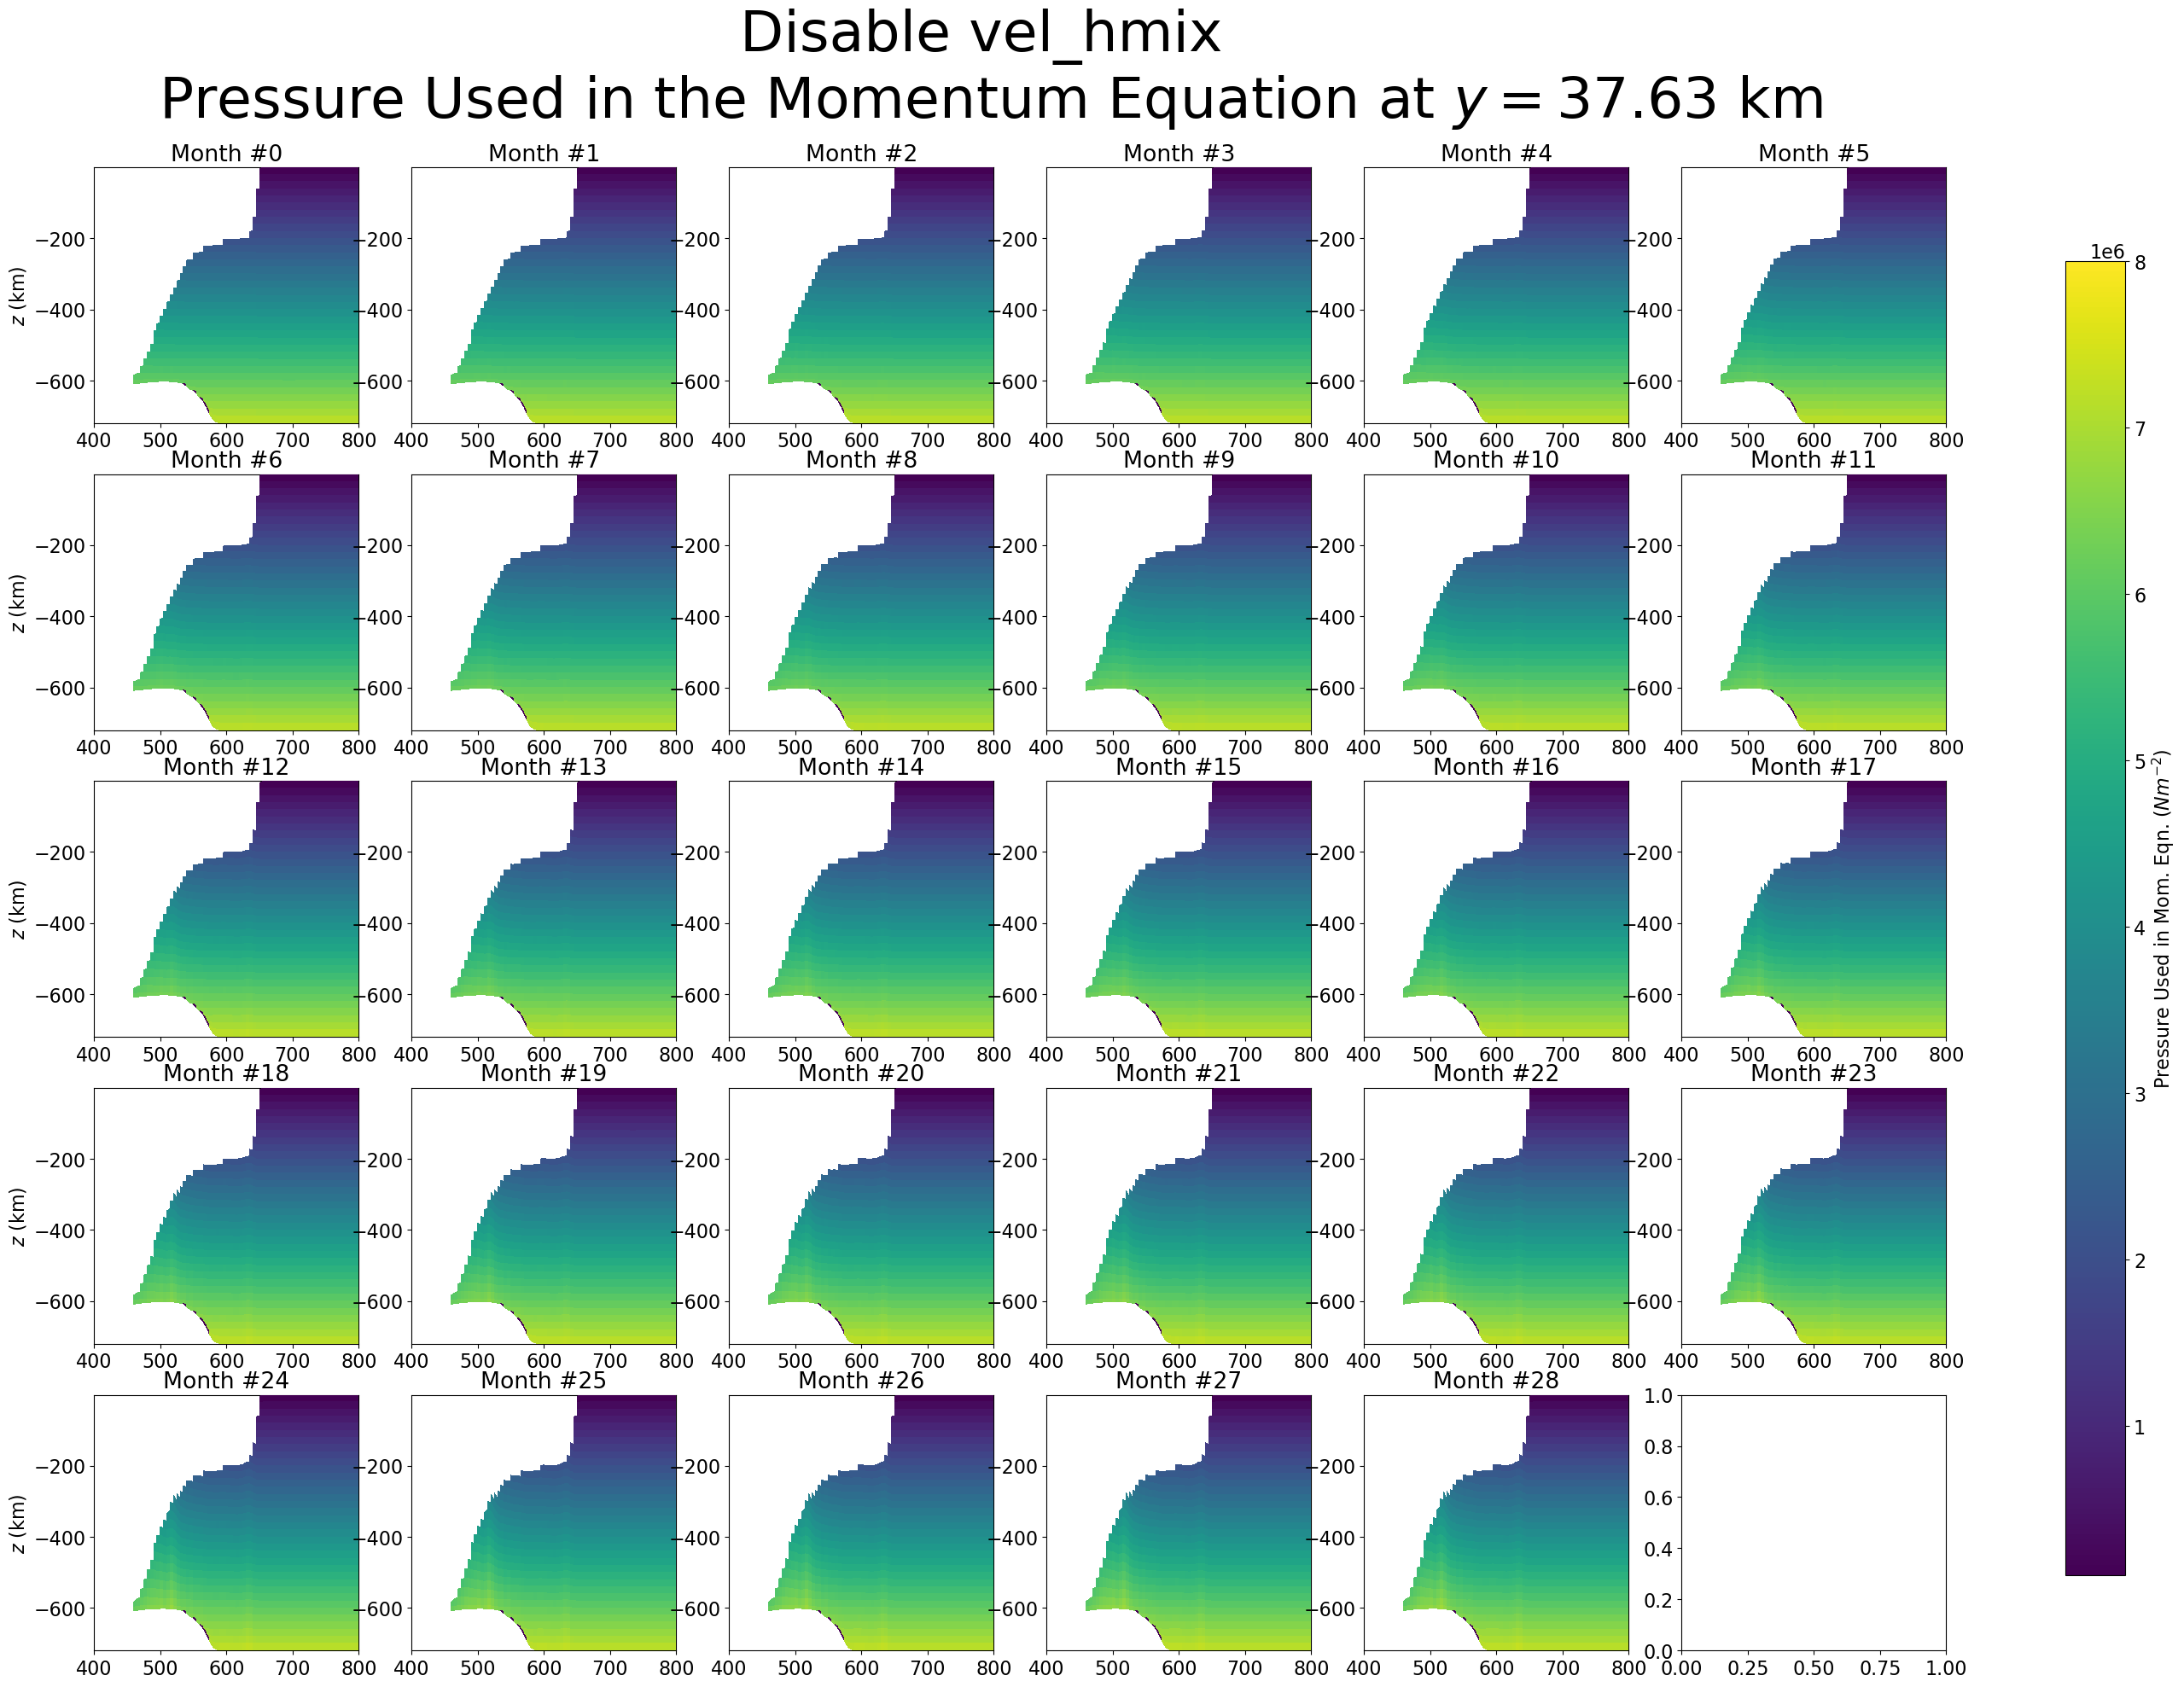

In [36]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(5,6, figsize=(28,22))

y_idx = 8
for r in np.arange(0,5,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output_vel_hmix.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output_vel_hmix.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_hmix.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_hmix.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=100000,vmax=8000000,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 5:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1
        if midx == len(ds_output_RK4.Time):
            break
            
    if midx == len(ds_output_RK4.Time):
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Pressure Used in Mom. Eqn. ($N m^{-2}$)')
fig.suptitle('Disable vel_hmix \n'+r'Pressure Used in the Momentum Equation at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=48, ha='center', x = 0.5, y = 0.985)
plt.show()

/tmp/ipykernel_795308/3330635950.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_hmix.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_hmix.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),
/tmp/ipykernel_795308/3330635950.py:37: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')


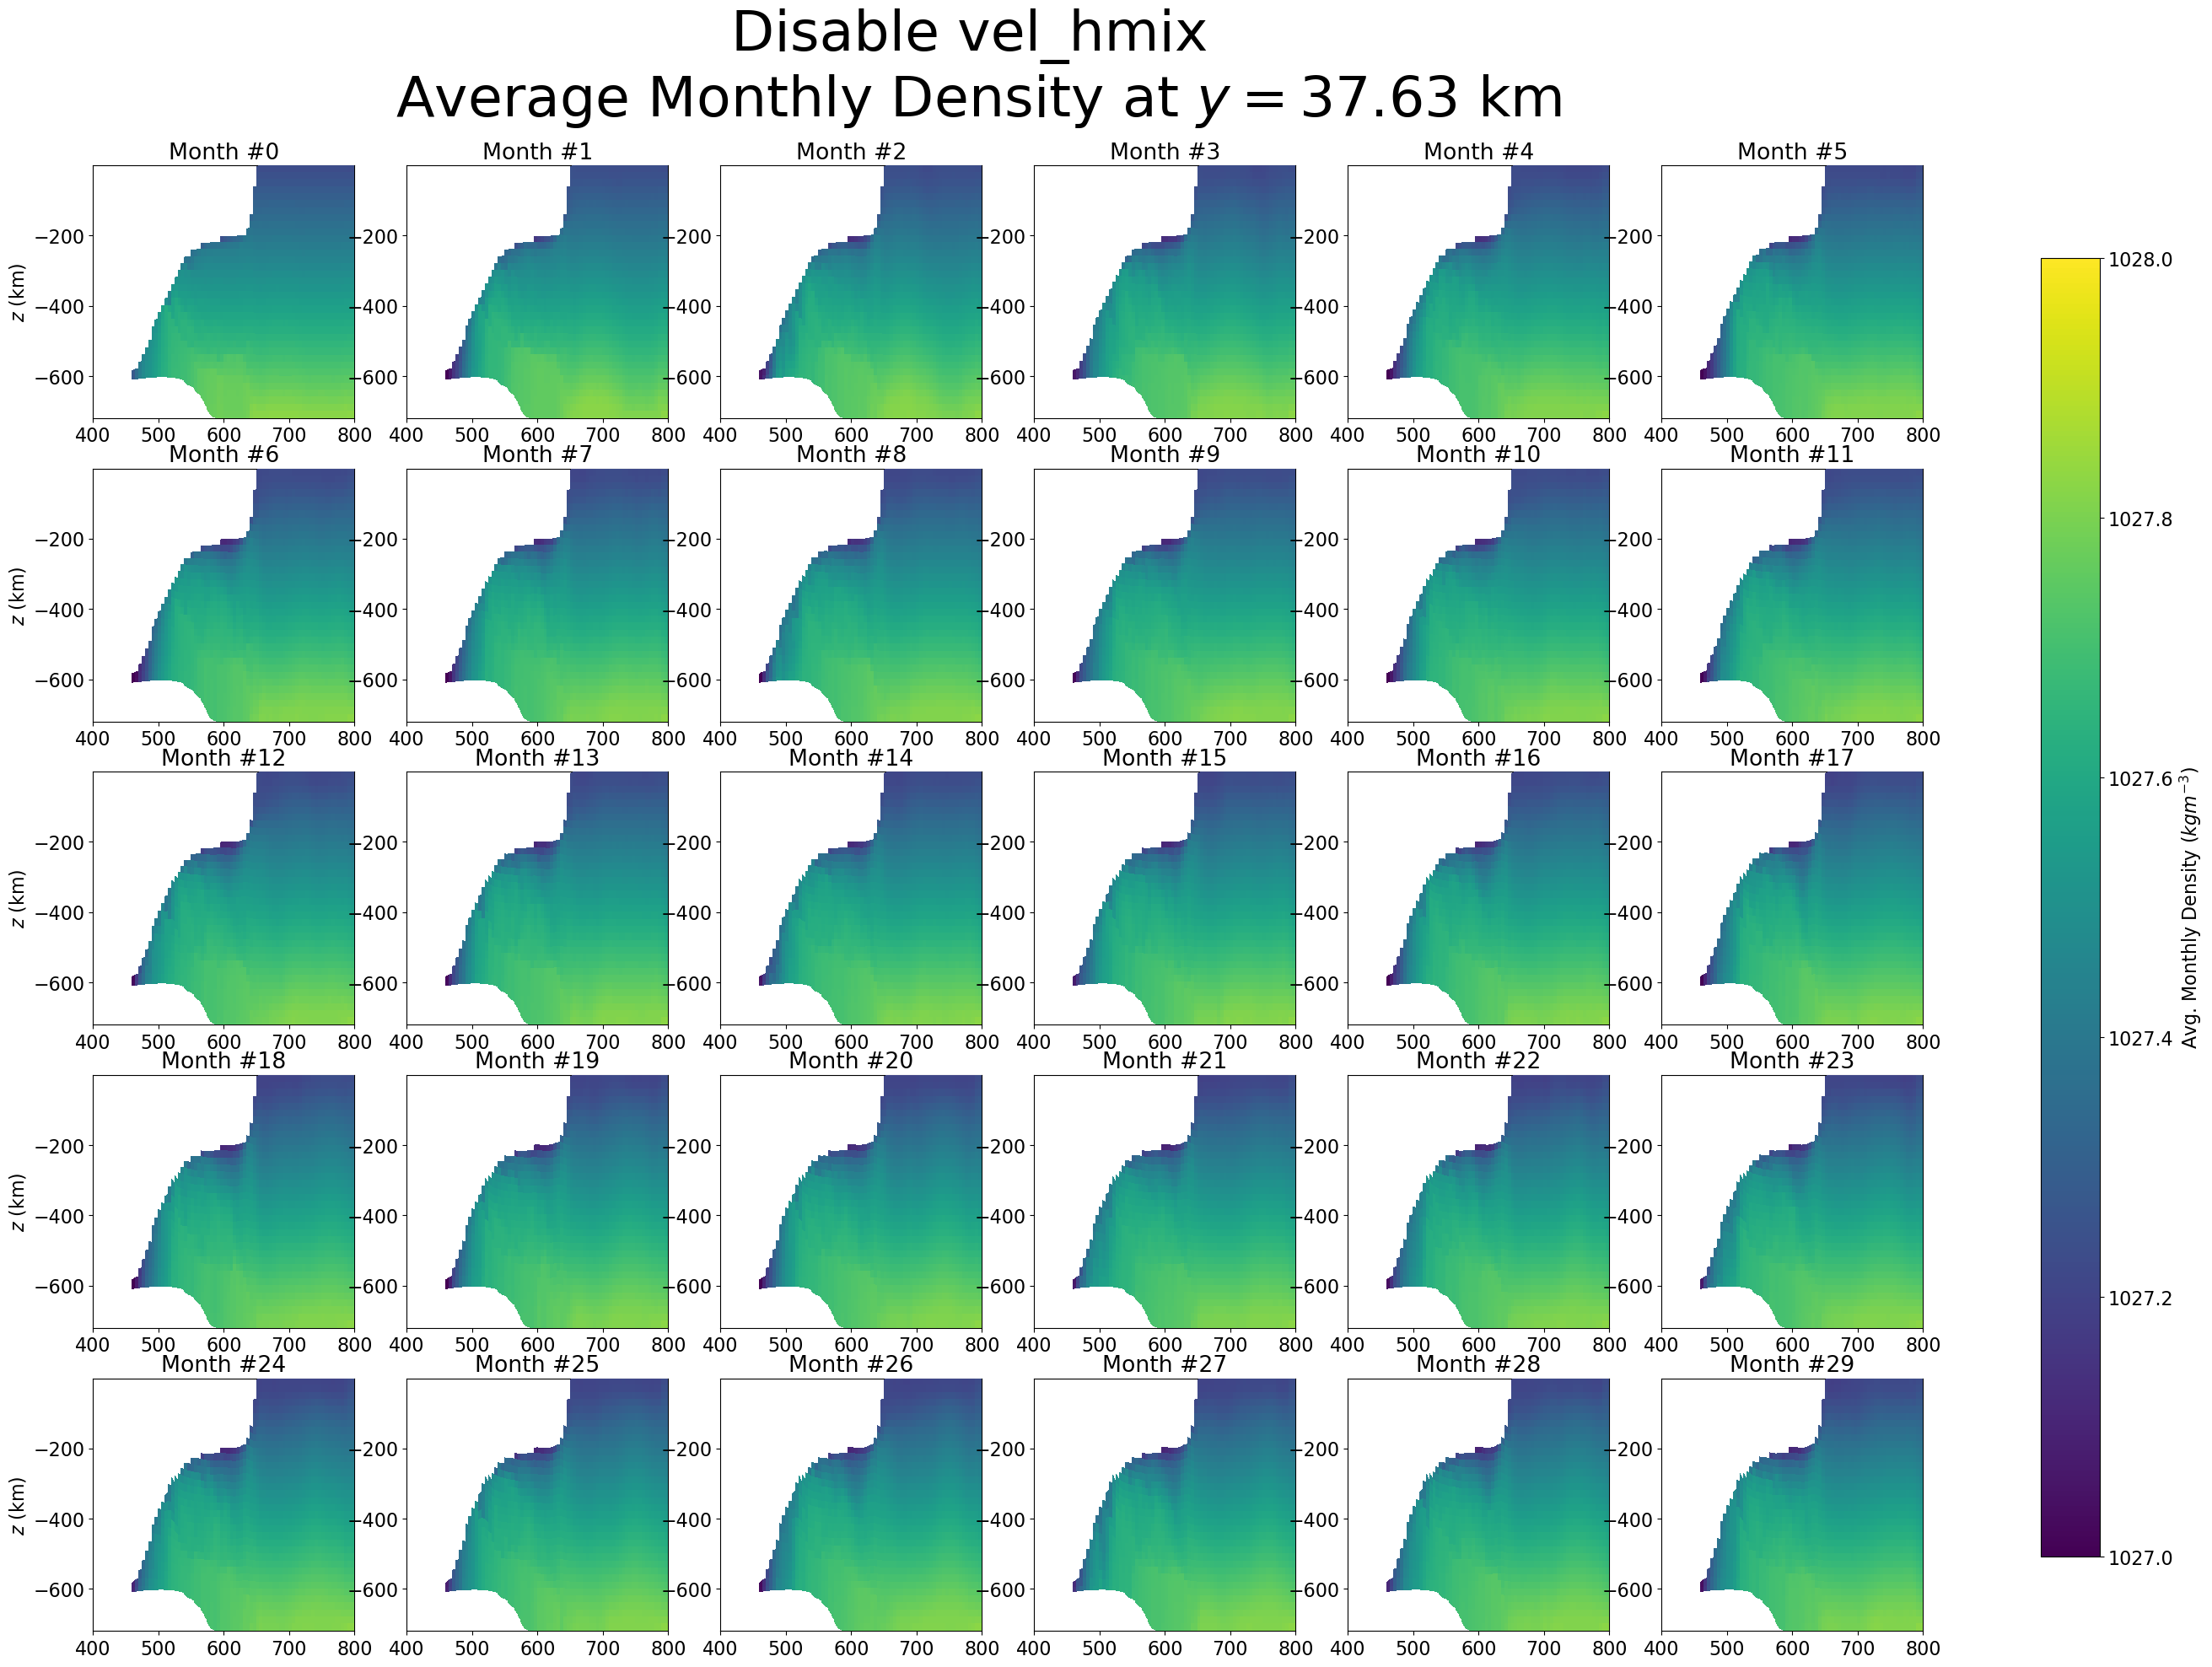

In [41]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(5,6, figsize=(28,22))

y_idx = 8
for r in np.arange(0,5,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output_vel_hmix.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output_vel_hmix.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_hmix.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_hmix.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=1027,vmax=1028,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 5:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1
        
        if midx == len(ds_output_vel_hmix.Time):
            break
            
    if midx == len(ds_output_vel_hmix.Time):
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')
fig.suptitle('Disable vel_hmix \n'+r'Average Monthly Density at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=48, ha='center', x = 0.5, y = 0.985)
plt.show()

disable vel_hadv:

In [25]:
ds_land_ice_fluxes_vel_hadv = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_hadv/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/land_ice_fluxes.nc')
ds_output_vel_hadv = xr.open_dataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_hadv/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/output.nc')
ds_timeMonthly_vel_hadv = xr.open_mfdataset('/pscratch/sd/m/mlarson/pr_100_dropTerms/disable_vel_hadv/ocean/isomip_plus/planar/5km/z-level/Ocean0/simulation/timeSeriesStatsMonthly.*.nc')

/tmp/ipykernel_795308/3427624203.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_hadv.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_hadv.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),


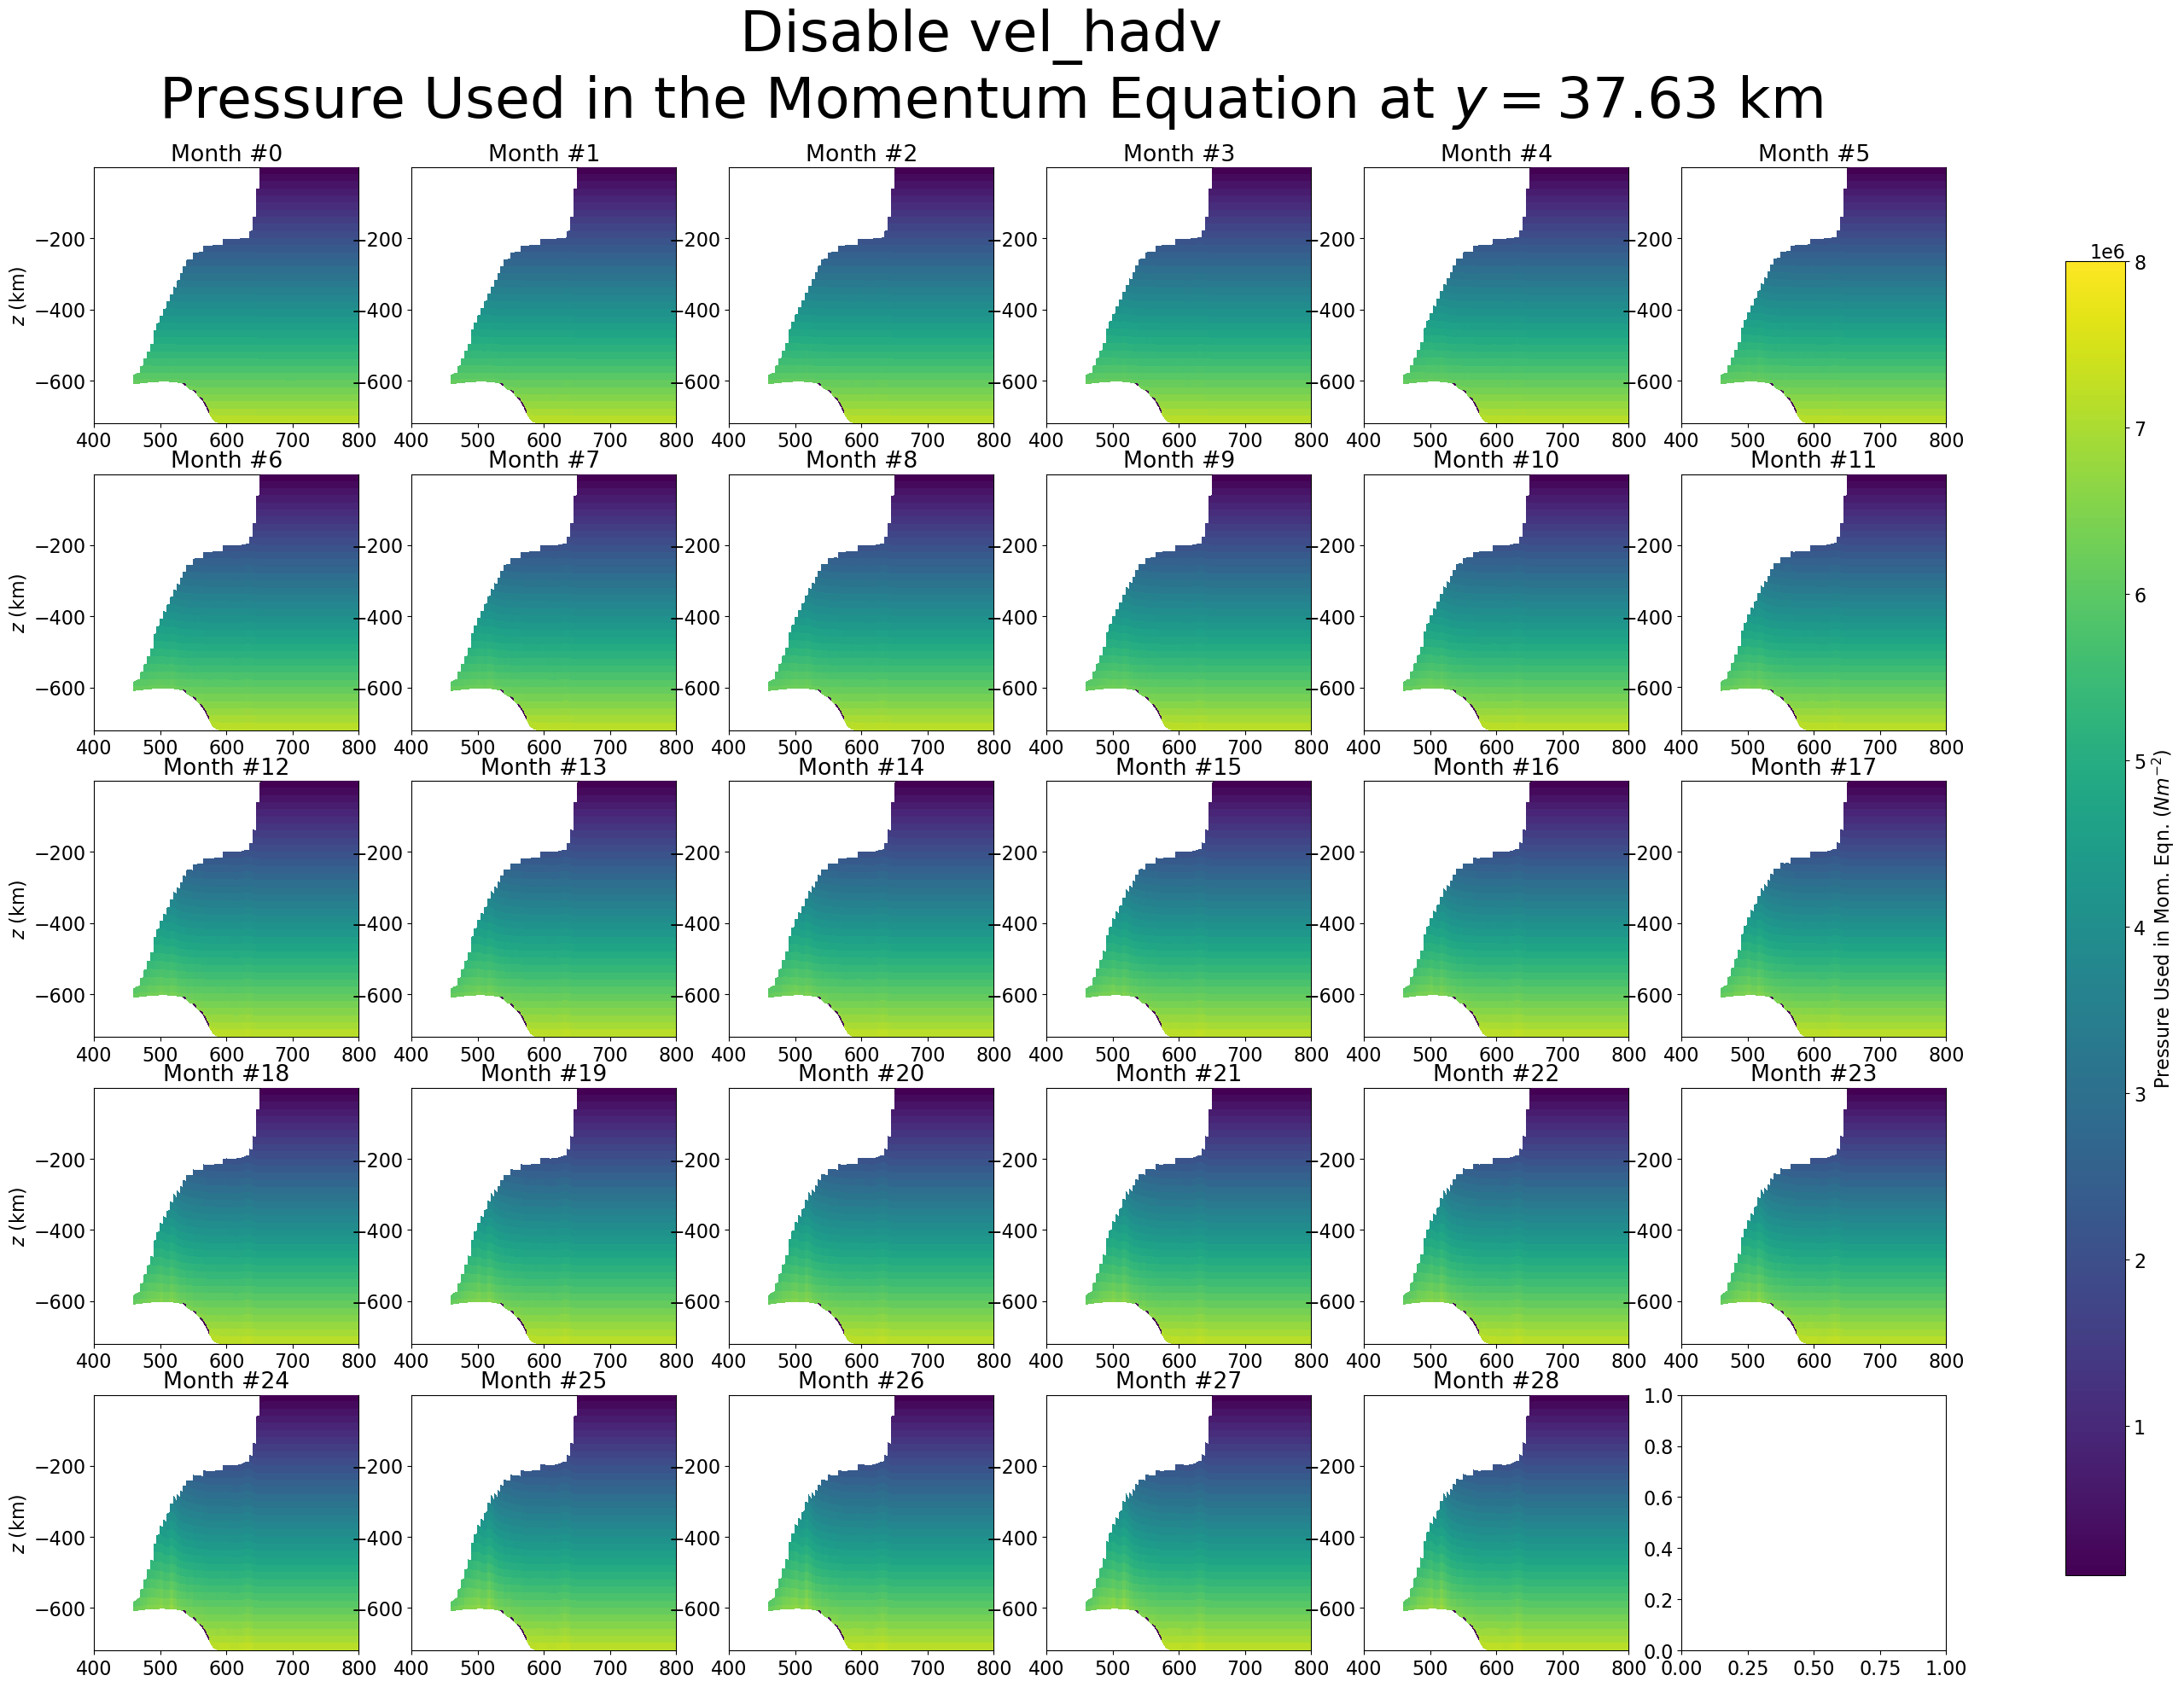

In [37]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(5,6, figsize=(28,22))

y_idx = 8
for r in np.arange(0,5,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output_vel_hadv.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output_vel_hadv.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_hadv.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_hadv.timeMonthly_avg_pressure.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=100000,vmax=8000000,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 5:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1
        if midx == len(ds_output_RK4.Time):
            break
            
    if midx == len(ds_output_RK4.Time):
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Pressure Used in Mom. Eqn. ($N m^{-2}$)')
fig.suptitle('Disable vel_hadv \n'+r'Pressure Used in the Momentum Equation at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=48, ha='center', x = 0.5, y = 0.985)
plt.show()

/tmp/ipykernel_795308/1226327743.py:15: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_hadv.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_hadv.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),
/tmp/ipykernel_795308/1226327743.py:37: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')


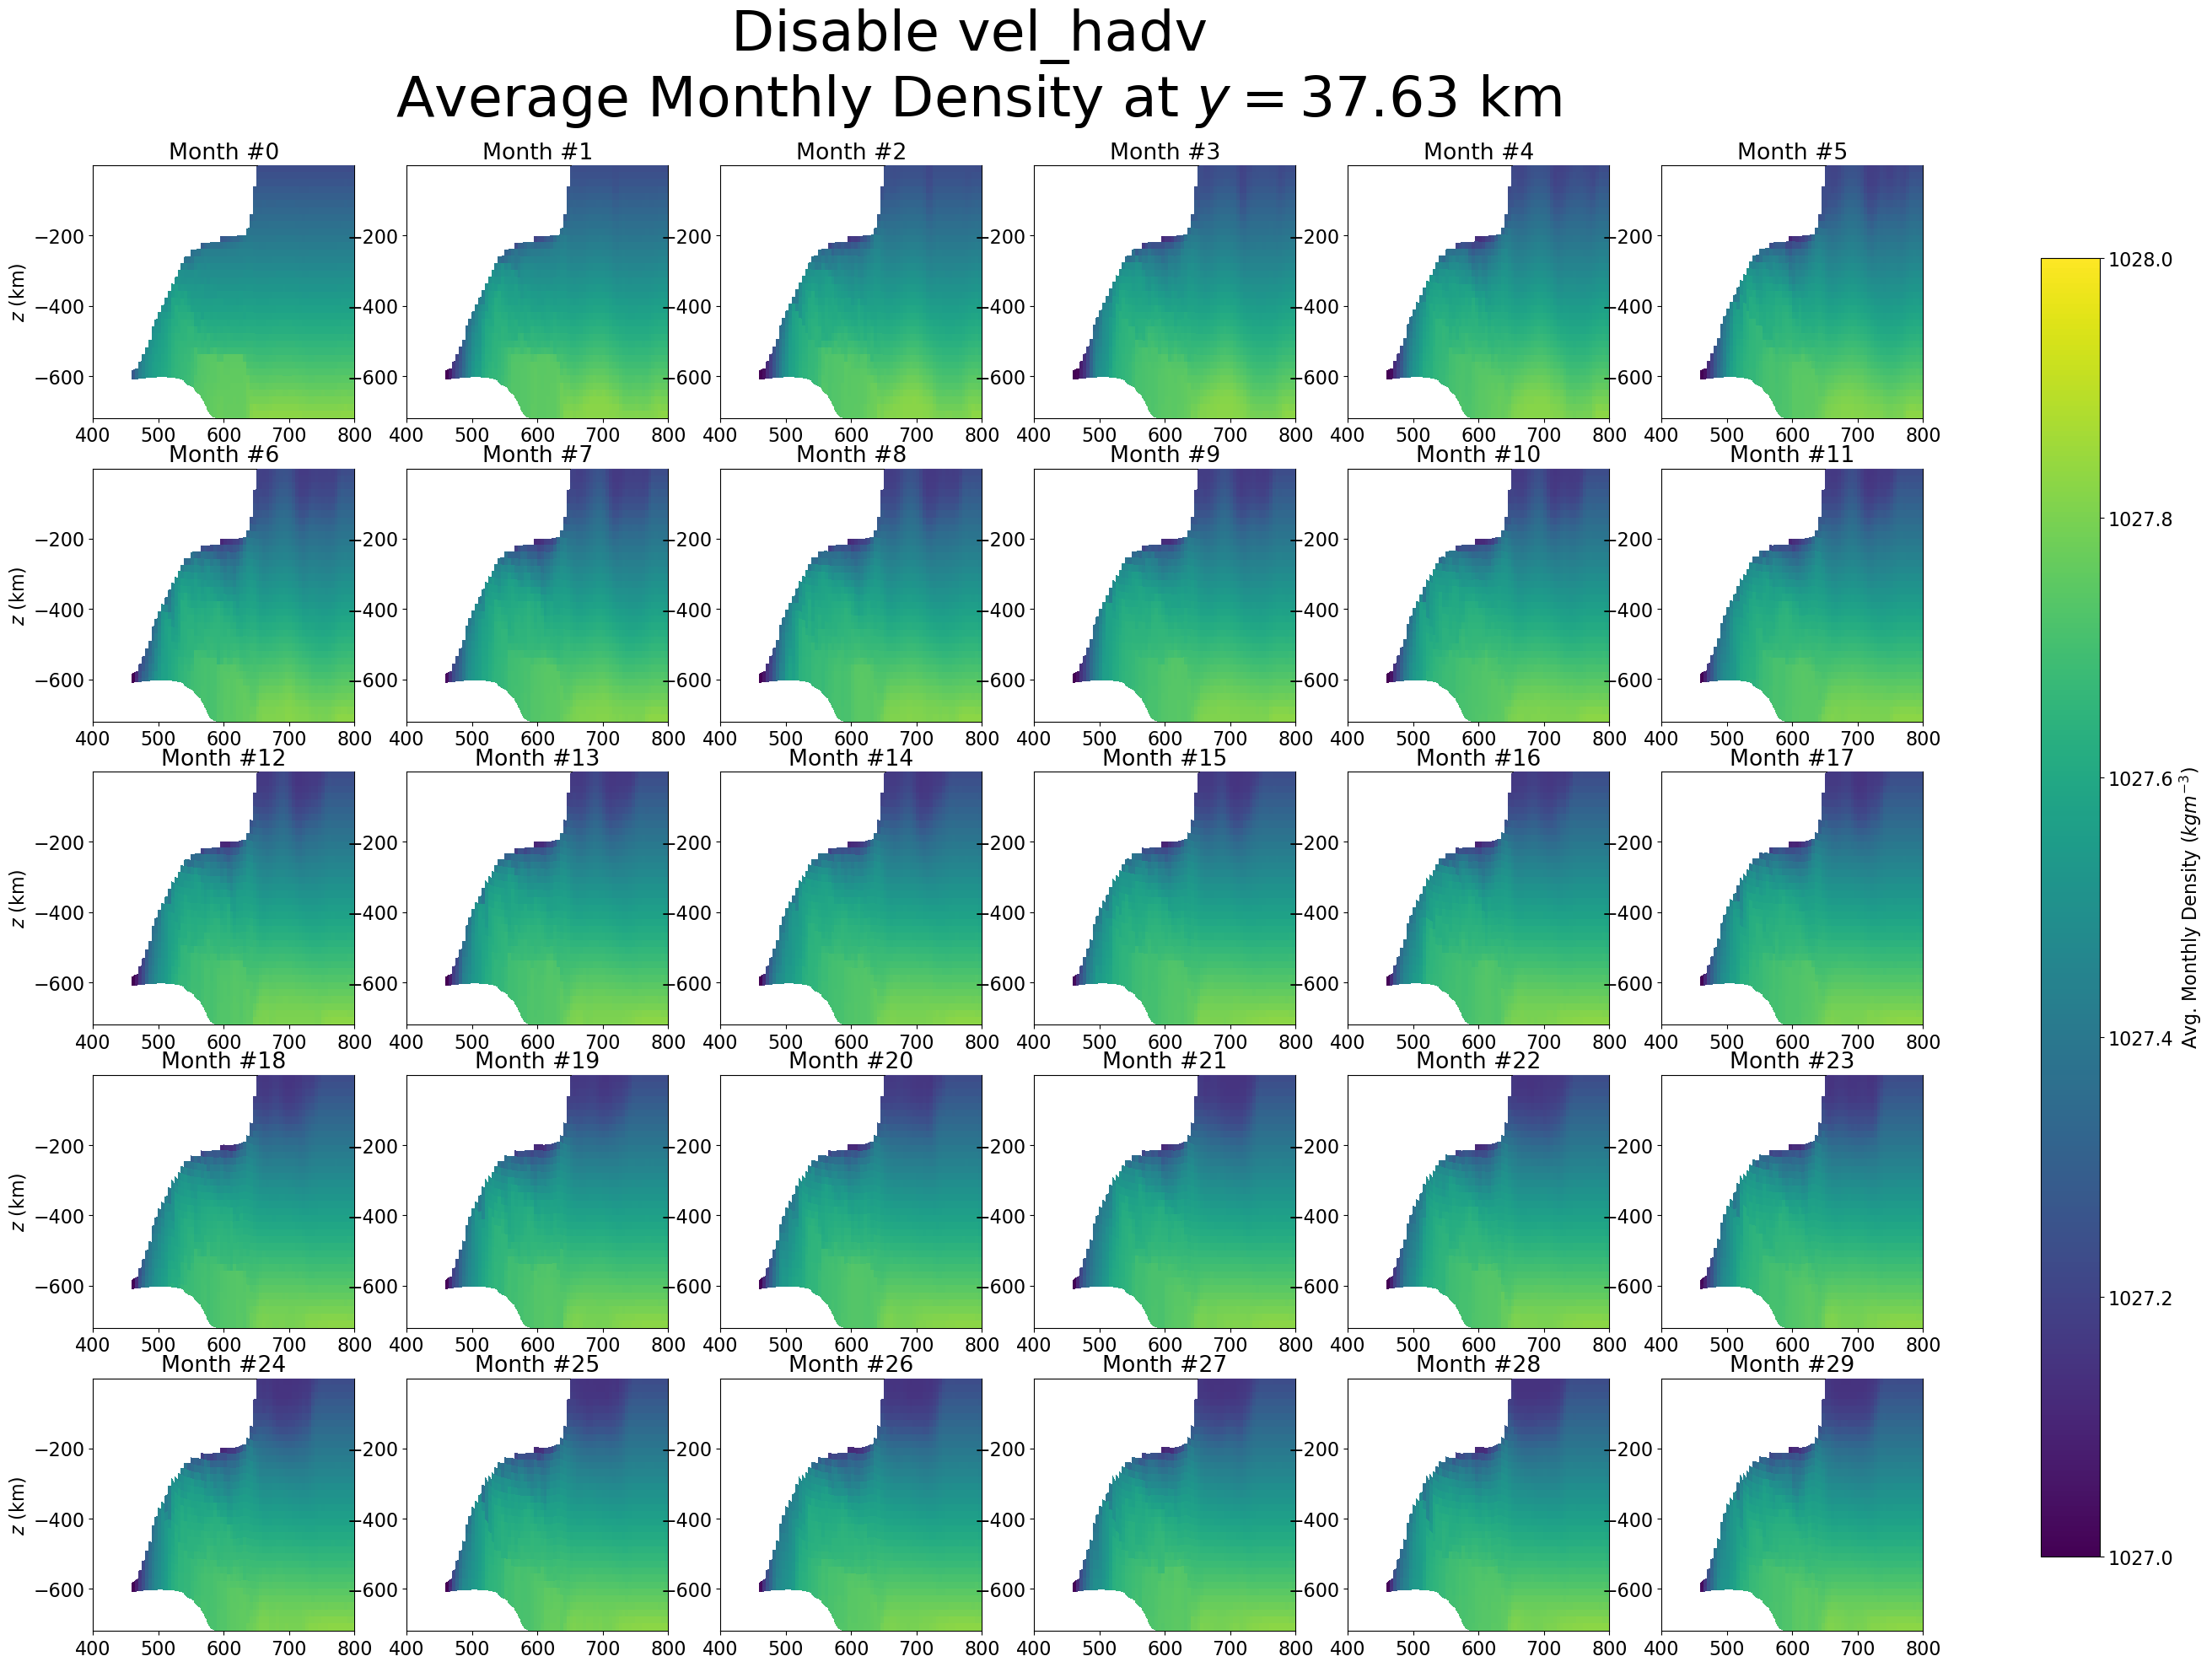

In [40]:
# %matplotlib widget 
%matplotlib inline

midx = 0
fig, ax = plt.subplots(5,6, figsize=(28,22))

y_idx = 8
for r in np.arange(0,5,1):
    for c in np.arange(0,6,1):
        # Make the grid
        reshaped_xCell = [ds_output_vel_hadv.xCell.isel(nCells=larger_same_y_idx[y_idx]).values for i in range(len(ds_output_vel_hadv.nVertLevels))]
        reshaped_xCell = np.transpose(reshaped_xCell)

        levs = np.arange(-5,10.5,0.5)
        im = ax[r,c].pcolor(reshaped_xCell/1000.,ds_output_vel_hadv.zMid.isel(Time=midx,nCells=larger_same_y_idx[y_idx]),ds_timeMonthly_vel_hadv.timeMonthly_avg_density.isel(Time=midx,nCells=larger_same_y_idx[y_idx]), 
                         vmin=1027,vmax=1028,cmap="viridis",alpha=1,zorder=10)

        ax[r,c].set_title('Month #'+str(midx))
        
        if r == 8:
            ax[r,c].set_xlabel('$x$ (km)')
        if c == 0:
            ax[r,c].set_ylabel('$z$ (km)')
        
        ax[r,c].set_xlim(xmin=400)
        
        midx+=1
        
        if midx == len(ds_output_vel_hadv.Time):
            break
            
    if midx == len(ds_output_vel_hadv.Time):
            break

fig.subplots_adjust(right=0.9,top=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.025, 0.7])
fig.colorbar(im, cax=cbar_ax,orientation='vertical', label = 'Avg. Monthly Density ($kg m^{-3}$)')
fig.suptitle('Disable vel_hadv \n'+r'Average Monthly Density at $y = $'+"{0:.2f}".format(ds_output.yCell[larger_same_y_idx[y_idx][0]].values/1000)+' km', size=48, ha='center', x = 0.5, y = 0.985)
plt.show()

In [39]:
len(ds_output_vel_hadv.Time)

32